In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
case_names = [    
              "Thermal_Base",
              "2_Hr_BESS", 
              "2_Hr_BESS_Fuelx2",
              "4_Hr_BESS",
              "4_Hr_BESS_Fuelx2",
              "4_Hr_BESS_Fuelx3",
              "4_Hr_BESS_Fuelx4",
              "6_Hr_BESS",
              "6_Hr_BESS_Fuelx2",
              "8_Hr_BESS",
              "8_Hr_BESS_Fuelx2",
              "10_Hr_BESS",
              "10_Hr_BESS_Fuelx2",
              ]

In [3]:
import os

current_dir = os.getcwd()
print(current_dir)

c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\figures


In [4]:
plots_path = os.path.join(current_dir, 'plots') + "/"
pdf_path = os.path.join(current_dir, 'pdf_tables') + "/"
latex_path = os.path.join(current_dir, 'latex') + "/"
csv_path = os.path.join(current_dir, 'csv') + "/"
jpg_path = os.path.join(current_dir, 'jpg') + "/"
if not os.path.exists(plots_path):
    os.makedirs(plots_path)
if not os.path.exists(pdf_path):
    os.makedirs(pdf_path)
if not os.path.exists(latex_path):
    os.makedirs(latex_path)
if not os.path.exists(csv_path):
    os.makedirs(csv_path)
if not os.path.exists(jpg_path):
    os.makedirs(jpg_path)


In [5]:
# modeling scaling ModelScalingFactor
ModelScalingFactor = 1000

cem_path = os.path.join(os.path.dirname(current_dir), 'GenX.jl', 'research_systems')
policies_path = os.path.join(os.path.dirname(current_dir), 'SPCM', 'research_systems')

params_names = ['Inv_cost_MW', 'Inv_cost_MWh', 'Fixed_OM_cost_MW', 'Var_OM_cost_out', 
          'Fuel_cost', 'Var_OM_cost_in', 'StartCost', 'Charge_cost', 'EnergyRevenue', 
          'OperatingReserveRevenue', 'OperatingRegulationRevenue']

param_print_names = params_names

for i in range(len(param_print_names)):
    param_print_names[i] = param_print_names[i].replace("_", " ")

# economic_cost_params = ['Inv_cost_MW', 'Inv_cost_MWh', 'Fixed_OM_cost_MW', 'Var_OM_cost_out', 
#         'Fuel_cost', 'Var_OM_cost_in', 'StartCost']

system_costs = ['Inv_cost_MW', 'Inv_cost_MWh', 'Fixed_OM_cost_MW', 'Var_OM_cost_out', 
        'Fuel_cost', 'Var_OM_cost_in', 'StartCost']

economic_cost_params = system_costs + ['Charge_cost']

economic_revenue_params = ['EnergyRevenue', 'OperatingReserveRevenue', 'OperatingRegulationRevenue']

In [6]:
# get load data

load_data_raw = pd.read_csv(cem_path + '\\Thermal_Base\\' + 'system\\' + 'Demand_data.csv')
load_data = load_data_raw['Demand_MW_z1']

In [7]:
date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [8]:
unit_profit_dic = {case: None for case in case_names}
percentage_profits_dic = {case: None for case in case_names}
consumer_payments_dic = {case: None for case in case_names}
total_investment_costs_dic = {case: None for case in case_names}
total_operating_costs_dic = {case: None for case in case_names}
total_system_costs_dic = {case: None for case in case_names} 
total_inv_op_costs_dic = {case: None for case in case_names}
total_objective_dic = {case: None for case in case_names}
nse_costs_dic = {case: None for case in case_names}
total_nse_dic = {case: None for case in case_names}
total_unmet_rsv_dic = {case: None for case in case_names}
total_nse_cost_dic = {case: None for case in case_names}
total_unmet_rsv_cost_dic = {case: None for case in case_names}
total_fixed_om_costs_dic = {case: None for case in case_names}
total_var_om_out_costs_dic = {case: None for case in case_names}
total_fuel_costs_dic = {case: None for case in case_names}
total_var_om_in_costs_dic = {case: None for case in case_names}
total_start_costs_dic = {case: None for case in case_names}
total_charge_costs_dic = {case: None for case in case_names}

In [9]:
vre_dfGen = pd.read_csv(policies_path + '\\' + case_names[0] + '\\resources' + '\\Vre.csv')

In [10]:
vre_dfGen = pd.read_csv(policies_path + '\\' + case_names[0] + '\\resources' + '\\Vre.csv')
thermal_dfGen = pd.read_csv(policies_path + '\\' + case_names[0] + '\\resources' + '\\Thermal.csv')
storage_dfGen = pd.read_csv(policies_path + '\\' + case_names[0] + '\\resources' + '\\Storage.csv')

In [11]:
dfGen = pd.concat([vre_dfGen, thermal_dfGen, storage_dfGen], ignore_index=True)

In [12]:
dfGen

,Resource,Zone,Num_VRE_Bins,New_Build,Can_Retire,Existing_Cap_MW,Max_Cap_MW,Min_Cap_MW,Inv_Cost_per_MWyr,Fixed_OM_Cost_per_MWyr,...,Max_Cap_MWh,Min_Cap_MWh,Inv_Cost_per_MWhyr,Fixed_OM_Cost_per_MWhyr,Var_OM_Cost_per_MWh_In,Self_Disch,Eff_Up,Eff_Down,Min_Duration,Max_Duration
0,Land-Based Wind - Class 1 - Technology 1,1,1.0,1,0,32791.061172,-1,0,83289.329169,32443.047267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Utility PV - Class 1,1,1.0,1,0,17972.934821,-1,0,74134.164015,23765.603456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NG 2-on-1 Combined Cycle (F-Frame),1,NaN,1,0,46274.023418,-1,0,56221.989154,25875.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NG Combustion Turbine (F-Frame),1,NaN,1,0,9457.159921,-1,0,50580.567617,19575.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for case_name in case_names:

    print('Case Name: ' + case_name + '\n')

    # load generator characteristics from resources folder
    thermal_dfGen = pd.read_csv(policies_path + '\\' + case_name + '\\resources' + '\\Thermal.csv')
    vre_dfGen = pd.read_csv(policies_path + '\\' + case_name + '\\resources' + '\\Vre.csv')
    storage_dfGen = pd.read_csv(policies_path + '\\' + case_name + '\\resources' + '\\Storage.csv')

    # combine all resources to dfGen
    dfGen = pd.concat([thermal_dfGen, vre_dfGen, storage_dfGen], ignore_index=True)

    gen_capacity_gw = dfGen['Existing_Cap_MW'] / ModelScalingFactor
    gen_capacity_mw = dfGen['Existing_Cap_MW']
    gen_capacity_mwhour = dfGen['Existing_Cap_MWh']
    gen_capacity_mwhour = dfGen['Existing_Cap_MWh'] / ModelScalingFactor

    resource_list = dfGen['Resource']

    # solar and wind id
    solar_id = dfGen[dfGen['Resource'] == 'Utility PV - Class 1'].index[0]
    wind_id = dfGen[dfGen['Resource'] == 'Land-Based Wind - Class 1 - Technology 1'].index[0]

    cem_case = 'CEM_' + case_name + '_ABB\\'
    pf_case = 'PF_' + case_name + '\\'
    dlac_case = 'DLAC_' + case_name + '\\'
    dlac_imperfect_case = 'DLAC_imperfect_' + case_name + '\\'
    slac_case = 'SLAC_' + case_name + '\\'

    cem_results_path = cem_path + '\\' + case_name + '\\' + 'results\\'
    pf_results_path = policies_path + '\\' + case_name + '\\' + 'results_pf\\'
    dlac_results_path = policies_path + '\\' + case_name + '\\' + 'results_dlac-p\\'
    dlac_imperfect_results_path = policies_path + '\\' + case_name + '\\' + 'results_dlac-i\\'
    slac_results_path = policies_path + '\\' + case_name + '\\' + 'results_slac\\'

    cem_raw = pd.read_csv(cem_results_path + 'NetRevenue.csv')
    pf_raw = pd.read_csv(pf_results_path + 'NetRevenue.csv')
    dlac_raw = pd.read_csv(dlac_results_path + 'NetRevenue.csv')
    dlac_imperfect_raw = pd.read_csv(dlac_imperfect_results_path + 'NetRevenue.csv')
    slac_raw = pd.read_csv(slac_results_path + 'NetRevenue.csv')

    cem_raw_prices = pd.read_csv(cem_results_path + 'prices.csv')
    pf_raw_prices = pd.read_csv(pf_results_path + 'price_electricity.csv', header=None)
    dlac_raw_prices = pd.read_csv(dlac_results_path + 'price_electricity.csv', header=None)
    dlac_imperfect_raw_prices = pd.read_csv(dlac_imperfect_results_path + 'price_electricity.csv', header=None)
    slac_raw_prices = pd.read_csv(slac_results_path + 'price_electricity.csv', header=None)

    column_names = cem_raw.columns[1:]
    ### get cem dataframe of only non-trivial resources
    cem_raw_upd = cem_raw[cem_raw['Resource'].isin(resource_list)]
    # make sure the order of the resources is the same in dfGen and cem_raw_upd
    cem_raw_upd = cem_raw_upd.set_index('Resource').reindex(resource_list).reset_index()


    gen_print_names = resource_list
    # print(gen_print_names)

    param_print_names = params_names

    for i in range(len(param_print_names)):
        param_print_names[i] = param_print_names[i].replace("_", " ")

    # get cem total nse and unmet rsv and total cem nse and unmet rsv costs
    cem_costs_genx = pd.read_csv(cem_results_path + 'costs.csv')
    cem_sum_ur_cost = cem_costs_genx[cem_costs_genx['Costs'] == 'cUnmetRsv']['Total'].values[0]
    cem_total_unmet_rsv = cem_sum_ur_cost / 1000
    cem_total_nse_cost = cem_costs_genx[cem_costs_genx['Costs'] == 'cNSE']['Total'].values[0]
    cem_total_nse = cem_total_nse_cost / 5000

    # load in timeseries of nse and unmet rsv from LACs
    cem_nse = pd.read_csv(cem_results_path + 'nse.csv')
    pf_nse = pd.read_csv(pf_results_path + 'zone_nse.csv', header=None)
    dlac_nse = pd.read_csv(dlac_results_path + 'zone_nse.csv', header=None)
    dlac_imperfect_nse = pd.read_csv(dlac_imperfect_results_path + 'zone_nse.csv', header=None)
    slac_nse = pd.read_csv(slac_results_path + 'zone_nse.csv', header=None)

    dlac_ur = pd.read_csv(dlac_results_path + 'zone_unmet_rsv.csv', header=None)
    pf_ur = pd.read_csv(pf_results_path + 'zone_unmet_rsv.csv', header=None)
    dlac_imperfect_ur = pd.read_csv(dlac_imperfect_results_path + 'zone_unmet_rsv.csv', header=None)
    slac_ur = pd.read_csv(slac_results_path + 'zone_unmet_rsv.csv', header=None)

    pf_nse_total = pf_nse.sum(axis=0)
    dlac_nse_total = dlac_nse.sum(axis=0)
    dlac_imperfect_nse_total = dlac_imperfect_nse.sum(axis=0)
    slac_nse_total = slac_nse.sum(axis=0)

    pf_ur_total = pf_ur.sum(axis=0)
    dlac_ur_total = dlac_ur.sum(axis=0)
    dlac_imperfect_ur_total = dlac_imperfect_ur.sum(axis=0)
    slac_ur_total = slac_ur.sum(axis=0)

    # print(dlac_nse_total)

    nse_totals = {
        'CEM': f"{cem_total_nse:.4e}",
        'PF': f"{pf_nse_total[0]:.4e}",
        'DLAC-p': f"{dlac_nse_total[0]:.4e}",
        'DLAC-i': f"{dlac_imperfect_nse_total[0]:.4e}",
        'SLAC': f"{slac_nse_total[0]:.4e}"
    }

    unmet_rsv_totals = {
        'CEM': f"{cem_total_unmet_rsv:.4e}",
        'PF': f"{pf_ur_total[0]:.4e}",
        'DLAC-p': f"{dlac_ur_total[0]:.4e}",
        'DLAC-i': f"{dlac_imperfect_ur_total[0]:.4e}",
        'SLAC': f"{slac_ur_total[0]:.4e}"
    }


    total_nse_dic[case_name] = nse_totals
    total_unmet_rsv_dic[case_name] = unmet_rsv_totals

    # calculate reg and rsv revenue sums
    cem_reg_revenue_sum = cem_raw_upd['OperatingRegulationRevenue'].sum()
    cem_rsv_revenue_sum = cem_raw_upd['OperatingReserveRevenue'].sum()

    pf_reg_revenue_sum = pf_raw['OperatingRegulationRevenue'].sum()
    pf_rsv_revenue_sum = pf_raw['OperatingReserveRevenue'].sum()

    dlac_reg_revenue_sum = dlac_raw['OperatingRegulationRevenue'].sum()
    dlac_rsv_revenue_sum = dlac_raw['OperatingReserveRevenue'].sum()

    dlac_imperfect_reg_revenue_sum = dlac_imperfect_raw['OperatingRegulationRevenue'].sum()
    dlac_imperfect_rsv_revenue_sum = dlac_imperfect_raw['OperatingReserveRevenue'].sum()

    slac_reg_revenue_sum = slac_raw['OperatingRegulationRevenue'].sum()
    slac_rsv_revenue_sum = slac_raw['OperatingReserveRevenue'].sum()



    # load unmet reserves cost information
    pf_ur_cost = pd.read_csv(pf_results_path + 'revenue_unmet_rsv_cost.csv', header=None)
    dlac_ur_cost = pd.read_csv(dlac_results_path + 'revenue_unmet_rsv_cost.csv', header=None)
    dlac_imperfect_ur_cost = pd.read_csv(dlac_imperfect_results_path + 'revenue_unmet_rsv_cost.csv', header=None)
    slac_ur_cost = pd.read_csv(slac_results_path + 'revenue_unmet_rsv_cost.csv', header=None)

    # if there are more columns than rows, transpose the dataframe
    if pf_ur_cost.shape[0] < pf_ur_cost.shape[1]:
        pf_ur_cost = pf_ur_cost.T
    if dlac_ur_cost.shape[0] < dlac_ur_cost.shape[1]:
        dlac_ur_cost = dlac_ur_cost.T
    if dlac_imperfect_ur_cost.shape[0] < dlac_imperfect_ur_cost.shape[1]:
        dlac_imperfect_ur_cost = dlac_imperfect_ur_cost.T
    if slac_ur_cost.shape[0] < slac_ur_cost.shape[1]:
        slac_ur_cost = slac_ur_cost.T


    pf_nse_cost = pd.read_csv(pf_results_path + 'revenue_nse_cost.csv', header=None)
    dlac_nse_cost = pd.read_csv(dlac_results_path + 'revenue_nse_cost.csv', header=None)
    dlac_imperfect_nse_cost = pd.read_csv(dlac_imperfect_results_path + 'revenue_nse_cost.csv', header=None)
    slac_nse_cost = pd.read_csv(slac_results_path + 'revenue_nse_cost.csv', header=None)

    # if there are more columns than rows, transpose the dataframe
    if pf_nse_cost.shape[0] < pf_nse_cost.shape[1]:
        pf_nse_cost = pf_nse_cost.T
    if dlac_nse_cost.shape[0] < dlac_nse_cost.shape[1]:
        dlac_nse_cost = dlac_nse_cost.T
    if dlac_imperfect_nse_cost.shape[0] < dlac_imperfect_nse_cost.shape[1]:
        dlac_imperfect_nse_cost = dlac_imperfect_nse_cost.T
    if slac_nse_cost.shape[0] < slac_nse_cost.shape[1]:
        slac_nse_cost = slac_nse_cost.T

    pf_sum_nse_cost = pf_nse_cost.sum(axis=0)[0]
    dlac_sum_nse_cost = dlac_nse_cost.sum(axis=0)[0]
    dlac_imperfect_sum_nse_cost = dlac_imperfect_nse_cost.sum(axis=0)[0]
    slac_sum_nse_cost = slac_nse_cost.sum(axis=0)[0]

    pf_sum_ur_cost = pf_ur_cost.sum(axis=0)[0]
    dlac_sum_ur_cost = dlac_ur_cost.sum(axis=0)[0]
    dlac_imperfect_sum_ur_cost = dlac_imperfect_ur_cost.sum(axis=0)[0]
    slac_sum_ur_cost = slac_ur_cost.sum(axis=0)[0]

    total_nse_cost_dic[case_name] = {
        'CEM': f"{cem_total_nse_cost:.4e}",
        'PF': f"{pf_sum_nse_cost:.4e}",
        'DLAC-p': f"{dlac_sum_nse_cost:.4e}",
        'DLAC-i': f"{dlac_imperfect_sum_nse_cost:.4e}",
        'SLAC': f"{slac_sum_nse_cost:.4e}"
    }

    total_unmet_rsv_cost_dic[case_name] = {
        'CEM': f"{cem_sum_ur_cost:.4e}",
        'PF': f"{pf_sum_ur_cost:.4e}",
        'DLAC-p': f"{dlac_sum_ur_cost:.4e}",
        'DLAC-i': f"{dlac_imperfect_sum_ur_cost:.4e}",
        'SLAC': f"{slac_sum_ur_cost:.2e}"
    }

    cem_prices = cem_raw_prices['1']
    pf_prices = pf_raw_prices[0]
    dlac_prices = dlac_raw_prices[0]
    dlac_imperfect_prices = dlac_imperfect_raw_prices[0]
    slac_prices = slac_raw_prices[0]

    cem_costs = cem_raw_upd[economic_cost_params]
    pf_costs = pf_raw[economic_cost_params]
    dlac_costs = dlac_raw[economic_cost_params]
    dlac_imperfect_costs = dlac_imperfect_raw[economic_cost_params]
    slac_costs = slac_raw[economic_cost_params]

    cem_economics = cem_raw_upd[economic_cost_params + economic_revenue_params]
    pf_economics = pf_raw[economic_cost_params + economic_revenue_params]
    dlac_economics = dlac_raw[economic_cost_params + economic_revenue_params]
    dlac_imperfect_economics = dlac_imperfect_raw[economic_cost_params + economic_revenue_params]
    slac_economics = slac_raw[economic_cost_params + economic_revenue_params]

    cem_economics_copy = cem_economics.copy()
    pf_economics_copy = pf_economics.copy()
    dlac_economics_copy = dlac_economics.copy()
    dlac_imperfect_economics_copy = dlac_imperfect_economics.copy()
    slac_economics_copy = slac_economics.copy()

    cem_economics_copy[economic_cost_params] = cem_economics_copy[economic_cost_params] * -1
    pf_economics_copy[economic_cost_params] = pf_economics_copy[economic_cost_params] * -1
    dlac_economics_copy[economic_cost_params] = dlac_economics_copy[economic_cost_params] * -1
    dlac_imperfect_economics_copy[economic_cost_params] = dlac_imperfect_economics_copy[economic_cost_params] * -1
    slac_economics_copy[economic_cost_params] = slac_economics_copy[economic_cost_params] * -1

    cem_profit = cem_economics_copy.sum(axis=1)
    pf_profit = pf_economics_copy.sum(axis=1)
    dlac_profit = dlac_economics_copy.sum(axis=1)
    dlac_imperfect_profit = dlac_imperfect_economics_copy.sum(axis=1)
    slac_profit = slac_economics_copy.sum(axis=1)

    cem_economics_scaled = cem_economics_copy / ModelScalingFactor**2
    pf_economics_scaled = pf_economics_copy / ModelScalingFactor**2
    dlac_economics_scaled = dlac_economics_copy / ModelScalingFactor**2
    dlac_imperfect_economics_scaled = dlac_imperfect_economics_copy / ModelScalingFactor**2
    slac_economics_scaled = slac_economics_copy / ModelScalingFactor**2

    cem_scaled_profit = cem_economics_scaled.sum(axis=1)
    pf_scaled_profit = pf_economics_scaled.sum(axis=1)
    dlac_scaled_profit = dlac_economics_scaled.sum(axis=1)
    dlac_imperfect_scaled_profit = dlac_imperfect_economics_scaled.sum(axis=1)
    slac_scaled_profit = slac_economics_scaled.sum(axis=1)


    # define system costs for total system and objective calculations
    cem_system_costs = cem_raw_upd[system_costs]
    pf_system_costs = pf_raw[system_costs]
    dlac_system_costs = dlac_raw[system_costs]
    dlac_imperfect_system_costs = dlac_imperfect_raw[system_costs]
    slac_system_costs = slac_raw[system_costs]

    ###================================================================================================
    ### Total Investment Costs
    ###================================================================================================
    cem_mw_investment_costs = cem_raw['Inv_cost_MW'].sum()
    cem_mwhour_investment_costs = cem_raw['Inv_cost_MWh'].sum()

    pf_mw_investment_costs = pf_raw['Inv_cost_MW'].sum()
    pf_mwhour_investment_costs = pf_raw['Inv_cost_MWh'].sum()

    dlac_mw_investment_costs = dlac_raw['Inv_cost_MW'].sum()
    dlac_mwhour_investment_costs = dlac_raw['Inv_cost_MWh'].sum()

    dlac_imperfect_mw_investment_costs = dlac_imperfect_raw['Inv_cost_MW'].sum()
    dlac_imperfect_mwhour_investment_costs = dlac_imperfect_raw['Inv_cost_MWh'].sum()

    slac_mw_investment_costs = slac_raw['Inv_cost_MW'].sum()
    slac_mwhour_investment_costs = slac_raw['Inv_cost_MWh'].sum()

    cem_total_investment_costs = cem_mw_investment_costs + cem_mwhour_investment_costs
    pf_total_investment_costs = pf_mw_investment_costs + pf_mwhour_investment_costs
    dlac_total_investment_costs = dlac_mw_investment_costs + dlac_mwhour_investment_costs
    dlac_imperfect_total_investment_costs = dlac_imperfect_mw_investment_costs + dlac_imperfect_mwhour_investment_costs
    slac_total_investment_costs = slac_mw_investment_costs + slac_mwhour_investment_costs

    cem_total_investment_costs_sci = f"{cem_total_investment_costs:.4e}"
    pf_total_investment_costs_sci = f"{pf_total_investment_costs:.4e}"
    dlac_total_investment_costs_sci = f"{dlac_total_investment_costs:.4e}"
    dlac_imperfect_total_investment_costs_sci = f"{dlac_imperfect_total_investment_costs:.4e}"
    slac_total_investment_costs_sci = f"{slac_total_investment_costs:.4e}"

    total_investment_costs = {
        'CEM': cem_total_investment_costs_sci,
        'PF': pf_total_investment_costs_sci,
        'DLAC-p': dlac_total_investment_costs_sci,
        'DLAC-i': dlac_imperfect_total_investment_costs_sci,
        'SLAC': slac_total_investment_costs_sci
    }
    total_investment_costs_dic[case_name] = total_investment_costs


    ###================================================================================================
    ### Unit Profits
    ###================================================================================================
    
    cem_unit_profit_mw = cem_profit / gen_capacity_mw
    pf_unit_profit_mw = pf_profit / gen_capacity_mw
    dlac_unit_profit_mw = dlac_profit / gen_capacity_mw
    dlac_imperfect_unit_profit_mw = dlac_imperfect_profit / gen_capacity_mw
    slac_unit_profit_mw = slac_profit / gen_capacity_mw

    cem_unit_profit_mw_sci = cem_unit_profit_mw.apply(lambda x: f"{x:.4e}")
    pf_unit_profit_mw_sci = pf_unit_profit_mw.apply(lambda x: f"{x:.4e}")
    dlac_unit_profit_mw_sci = dlac_unit_profit_mw.apply(lambda x: f"{x:.4e}")
    dlac_imperfect_unit_profit_mw_sci = dlac_imperfect_unit_profit_mw.apply(lambda x: f"{x:.4e}")
    slac_unit_profit_mw_sci = slac_unit_profit_mw.apply(lambda x: f"{x:.4e}")

    cem_unit_profit_gw = cem_profit / gen_capacity_gw
    pf_unit_profit_gw = pf_profit / gen_capacity_gw
    dlac_unit_profit_gw = dlac_profit / gen_capacity_gw
    dlac_imperfect_unit_profit_gw = dlac_imperfect_profit / gen_capacity_gw
    slac_unit_profit_gw = slac_profit / gen_capacity_gw

    unit_profit_df = pd.DataFrame({
        'Resource': gen_print_names,
        'CEM': cem_unit_profit_mw_sci,
        'PF': pf_unit_profit_mw_sci,
        'DLAC-p': dlac_unit_profit_mw_sci,
        'DLAC-i': dlac_imperfect_unit_profit_mw_sci,
        'SLAC': slac_unit_profit_mw_sci
    })

    # sorted_unit_profits = sorted(unit_profits.items(), key=lambda item: item[1], reverse=True)

    unit_profit_dic[case_name] = unit_profit_df

    ###================================================================================================
    ### Calculate consumer payments
    ###================================================================================================

    cem_consumer_payments = cem_prices * load_data # - nse?
    pf_consumer_payments = pf_prices * load_data # - nse?
    dlac_consumer_payments = dlac_prices * load_data # - nse?
    dlac_imperfect_consumer_payments = dlac_imperfect_prices * load_data  # - nse?
    slac_consumer_payments = slac_prices * load_data # - nse?

    sum_cem_cp = cem_consumer_payments.sum() + cem_reg_revenue_sum + cem_rsv_revenue_sum
    sum_pf_cp = pf_consumer_payments.sum() + pf_reg_revenue_sum + pf_rsv_revenue_sum
    sum_dlac_cp = dlac_consumer_payments.sum() + dlac_reg_revenue_sum + dlac_rsv_revenue_sum
    sum_dlac_imperfect_cp = dlac_imperfect_consumer_payments.sum() + \
                                    dlac_imperfect_reg_revenue_sum + dlac_imperfect_rsv_revenue_sum
    sum_slac_cp = slac_consumer_payments.sum()  + slac_reg_revenue_sum + slac_rsv_revenue_sum

    # # Convert sums to millions of dollars
    # sum_cem_cp_mil = sum_cem_cp / 1e6
    # sum_dlac_cp_mil = sum_dlac_cp / 1e6
    # sum_dlac_imperfect_cp_mil = sum_dlac_imperfect_cp / 1e6
    # sum_slac_cp_mil = sum_slac_cp / 1e6

    sum_cem_cp_sci = f"{sum_cem_cp:.4e}"
    sum_pf_cp_sci = f"{sum_pf_cp:.4e}"
    sum_dlac_cp_sci = f"{sum_dlac_cp:.4e}"
    sum_dlac_imperfect_cp_sci = f"{sum_dlac_imperfect_cp:.4e}"
    sum_slac_cp_sci = f"{sum_slac_cp:.4e}"

    # Create a dictionary with the sums
    consumer_payments = {
        'CEM': sum_cem_cp_sci,
        'PF': sum_pf_cp_sci,
        'DLAC-p': sum_dlac_cp_sci,
        'DLAC-i': sum_dlac_imperfect_cp_sci,
        'SLAC': sum_slac_cp_sci
    }

    # # Sort the dictionary by values in descending order
    # sorted_consumer_payments = sorted(consumer_payments.items(), key=lambda item: item[1], reverse=True)

    consumer_payments_dic[case_name] = consumer_payments

    ###================================================================================================
    ### Calculate Total System Costs
    ###================================================================================================

    # nse_costs_dic[case_name] = {} # XXX why is this here?

    cem_total_system_costs = cem_system_costs.sum().sum() + cem_total_nse_cost
    pf_total_system_costs = pf_system_costs.sum().sum() + pf_sum_nse_cost
    dlac_total_system_costs = dlac_system_costs.sum().sum() + dlac_sum_nse_cost
    dlac_imperfect_total_system_costs = dlac_imperfect_system_costs.sum().sum() + dlac_imperfect_sum_nse_cost
    slac_total_system_costs = slac_system_costs.sum().sum() + slac_sum_nse_cost

    cem_total_system_costs_sci = f"{cem_total_system_costs:.4e}"
    pf_total_system_costs_sci = f"{pf_total_system_costs:.4e}"
    dlac_total_system_costs_sci = f"{dlac_total_system_costs:.4e}"
    dlac_imperfect_total_system_costs_sci = f"{dlac_imperfect_total_system_costs:.4e}"
    slac_total_system_costs_sci = f"{slac_total_system_costs:.4e}"

    total_inv_op_costs = {
        'CEM': f"{cem_costs.sum().sum():.4e}",
        'PF': f"{pf_costs.sum().sum():.4e}",
        'DLAC-p': f"{dlac_costs.sum().sum():.4e}",
        'DLAC-i': f"{dlac_imperfect_costs.sum().sum():.4e}",
        'SLAC': f"{slac_costs.sum().sum():.4e}"
    }

    total_inv_op_costs_dic[case_name] = total_inv_op_costs

    # Create a dictionary with the total costs
    total_system_costs = {
        'CEM': cem_total_system_costs_sci,
        'PF': pf_total_system_costs_sci,
        'DLAC-p': dlac_total_system_costs_sci,
        'DLAC-i': dlac_imperfect_total_system_costs_sci,
        'SLAC': slac_total_system_costs_sci
    }

    # # Sort the dictionary by values in descending order
    # sorted_total_system_costs = sorted(total_system_costs.items(), key=lambda item: item[1], reverse=True)

    # # Print the sorted total costs
    # for case, cost in sorted_total_system_costs:
    #     print("case_name: " f"{case}: {cost:.4e}")

    total_system_costs_dic[case_name] = total_system_costs

    ###================================================================================================
    ### Calculate global objective total
    ###================================================================================================
    cem_objective_total = cem_total_system_costs + cem_sum_ur_cost
    pf_objective_total = pf_total_system_costs + pf_sum_ur_cost
    dlac_objective_total = dlac_total_system_costs + dlac_sum_ur_cost
    dlac_imperfect_objective_total = dlac_imperfect_total_system_costs + dlac_imperfect_sum_ur_cost
    slac_objective_total = slac_total_system_costs + slac_sum_ur_cost

    cem_objective_total_sci = f"{cem_objective_total:.4e}"
    pf_objective_total_sci = f"{pf_objective_total:.4e}"
    dlac_objective_total_sci = f"{dlac_objective_total:.4e}"
    dlac_imperfect_objective_total_sci = f"{dlac_imperfect_objective_total:.4e}"
    slac_objective_total_sci = f"{slac_objective_total:.4e}"

    # Create a dictionary with the total costs
    total_objective = {
        'CEM': cem_objective_total_sci,
        'PF': pf_objective_total_sci,
        'DLAC-p': dlac_objective_total_sci,
        'DLAC-i': dlac_imperfect_objective_total_sci,
        'SLAC': slac_objective_total_sci
    }

    total_objective_dic[case_name] = total_objective

    ###================================================================================================
    ### Calculate Operating Costs
    ###================================================================================================
    operating_costs = ['Fixed_OM_cost_MW', 'Var_OM_cost_out', 'Fuel_cost', 'Var_OM_cost_in', 'StartCost']

    cem_operating_costs = cem_costs[operating_costs].sum().sum()
    pf_operating_costs = pf_costs[operating_costs].sum().sum()
    dlac_operating_costs = dlac_costs[operating_costs].sum().sum()
    dlac_imperfect_operating_costs = dlac_imperfect_costs[operating_costs].sum().sum()
    slac_operating_costs = slac_costs[operating_costs].sum().sum()

    cem_operating_costs_sci = f"{cem_operating_costs:.4e}"
    pf_operating_costs_sci = f"{pf_operating_costs:.4e}"
    dlac_operating_costs_sci = f"{dlac_operating_costs:.4e}"
    dlac_imperfect_operating_costs_sci = f"{dlac_imperfect_operating_costs:.4e}"
    slac_operating_costs_sci = f"{slac_operating_costs:.4e}"

    # Create a dictionary with the operating costs
    total_operating_costs = {
        'CEM': cem_operating_costs_sci,
        'PF': pf_operating_costs_sci,
        'DLAC-p': dlac_operating_costs_sci,
        'DLAC-i': dlac_imperfect_operating_costs_sci,
        'SLAC': slac_operating_costs_sci
    }

    total_operating_costs_dic[case_name] = total_operating_costs

    ###================================================================================================
    ### Calculate Fixed OM Costs
    ###================================================================================================

    cem_fixed_om_costs = cem_costs['Fixed_OM_cost_MW'].sum().sum()
    pf_fixed_om_costs = pf_costs['Fixed_OM_cost_MW'].sum().sum()
    dlac_fixed_om_costs = dlac_costs['Fixed_OM_cost_MW'].sum().sum()
    dlac_imperfect_fixed_om_costs = dlac_imperfect_costs['Fixed_OM_cost_MW'].sum().sum()
    slac_fixed_om_costs = slac_costs['Fixed_OM_cost_MW'].sum().sum()

    cem_fixed_om_costs_sci = f"{cem_fixed_om_costs:.4e}"
    pf_fixed_om_costs_sci = f"{pf_fixed_om_costs:.4e}"
    dlac_fixed_om_costs_sci = f"{dlac_fixed_om_costs:.4e}"
    dlac_imperfect_fixed_om_costs_sci = f"{dlac_imperfect_fixed_om_costs:.4e}"
    slac_fixed_om_costs_sci = f"{slac_fixed_om_costs:.4e}"

    # Create a dictionary with the fixed OM costs
    total_fixed_om_costs = {
        'CEM': cem_fixed_om_costs_sci,
        'PF': pf_fixed_om_costs_sci,
        'DLAC-p': dlac_fixed_om_costs_sci,
        'DLAC-i': dlac_imperfect_fixed_om_costs_sci,
        'SLAC': slac_fixed_om_costs_sci
    }

    total_fixed_om_costs_dic[case_name] = total_fixed_om_costs

    ###================================================================================================
    ### Calculate Variable OM Costs
    ###================================================================================================

    cem_var_om_costs = cem_costs['Var_OM_cost_out'].sum().sum()
    pf_var_om_costs = pf_costs['Var_OM_cost_out'].sum().sum()
    dlac_var_om_costs = dlac_costs['Var_OM_cost_out'].sum().sum()
    dlac_imperfect_var_om_costs = dlac_imperfect_costs['Var_OM_cost_out'].sum().sum()
    slac_var_om_costs = slac_costs['Var_OM_cost_out'].sum().sum()

    cem_var_om_costs_sci = f"{cem_var_om_costs:.4e}"
    pf_var_om_costs_sci = f"{pf_var_om_costs:.4e}"
    dlac_var_om_costs_sci = f"{dlac_var_om_costs:.4e}"
    dlac_imperfect_var_om_costs_sci = f"{dlac_imperfect_var_om_costs:.4e}"
    slac_var_om_costs_sci = f"{slac_var_om_costs:.4e}"

    # Create a dictionary with the variable OM costs
    total_var_om_costs = {
        'CEM': cem_var_om_costs_sci,
        'PF': pf_var_om_costs_sci,
        'DLAC-p': dlac_var_om_costs_sci,
        'DLAC-i': dlac_imperfect_var_om_costs_sci,
        'SLAC': slac_var_om_costs_sci
    }

    total_var_om_out_costs_dic[case_name] = total_var_om_costs

    ###================================================================================================
    ### Calculate Fuel Costs
    ###================================================================================================

    cem_fuel_costs = cem_costs['Fuel_cost'].sum().sum()
    pf_fuel_costs = pf_costs['Fuel_cost'].sum().sum()
    dlac_fuel_costs = dlac_costs['Fuel_cost'].sum().sum()
    dlac_imperfect_fuel_costs = dlac_imperfect_costs['Fuel_cost'].sum().sum()
    slac_fuel_costs = slac_costs['Fuel_cost'].sum().sum()

    cem_fuel_costs_sci = f"{cem_fuel_costs:.4e}"
    pf_fuel_costs_sci = f"{pf_fuel_costs:.4e}"
    dlac_fuel_costs_sci = f"{dlac_fuel_costs:.4e}"
    dlac_imperfect_fuel_costs_sci = f"{dlac_imperfect_fuel_costs:.4e}"
    slac_fuel_costs_sci = f"{slac_fuel_costs:.4e}"

    # Create a dictionary with the fuel costs
    total_fuel_costs = {
        'CEM': cem_fuel_costs_sci,
        'PF': pf_fuel_costs_sci,
        'DLAC-p': dlac_fuel_costs_sci,
        'DLAC-i': dlac_imperfect_fuel_costs_sci,
        'SLAC': slac_fuel_costs_sci
    }

    total_fuel_costs_dic[case_name] = total_fuel_costs

    ###================================================================================================
    ### Calculate Variable OM Costs
    ###================================================================================================

    cem_var_om_in_costs = cem_costs['Var_OM_cost_in'].sum().sum()
    pf_var_om_in_costs = pf_costs['Var_OM_cost_in'].sum().sum()
    dlac_var_om_in_costs = dlac_costs['Var_OM_cost_in'].sum().sum()
    dlac_imperfect_var_om_in_costs = dlac_imperfect_costs['Var_OM_cost_in'].sum().sum()
    slac_var_om_in_costs = slac_costs['Var_OM_cost_in'].sum().sum()

    cem_var_om_in_costs_sci = f"{cem_var_om_in_costs:.4e}"
    pf_var_om_in_costs_sci = f"{pf_var_om_in_costs:.4e}"
    dlac_var_om_in_costs_sci = f"{dlac_var_om_in_costs:.4e}"
    dlac_imperfect_var_om_in_costs_sci = f"{dlac_imperfect_var_om_in_costs:.4e}"
    slac_var_om_in_costs_sci = f"{slac_var_om_in_costs:.4e}"

    # Create a dictionary with the variable OM costs
    total_var_om_in_costs = {
        'CEM': cem_var_om_in_costs_sci,
        'PF': pf_var_om_in_costs_sci,
        'DLAC-p': dlac_var_om_in_costs_sci,
        'DLAC-i': dlac_imperfect_var_om_in_costs_sci,
        'SLAC': slac_var_om_in_costs_sci
    }

    total_var_om_in_costs_dic[case_name] = total_var_om_in_costs

    ###================================================================================================
    ### Calculate Start Costs
    ###================================================================================================

    cem_start_costs = cem_costs['StartCost'].sum().sum()
    pf_start_costs = pf_costs['StartCost'].sum().sum()
    dlac_start_costs = dlac_costs['StartCost'].sum().sum()
    dlac_imperfect_start_costs = dlac_imperfect_costs['StartCost'].sum().sum()
    slac_start_costs = slac_costs['StartCost'].sum().sum()

    cem_start_costs_sci = f"{cem_start_costs:.4e}"
    pf_start_costs_sci = f"{pf_start_costs:.4e}"
    dlac_start_costs_sci = f"{dlac_start_costs:.4e}"
    dlac_imperfect_start_costs_sci = f"{dlac_imperfect_start_costs:.4e}"
    slac_start_costs_sci = f"{slac_start_costs:.4e}"

    # Create a dictionary with the start costs
    total_start_costs = {
        'CEM': cem_start_costs_sci,
        'PF': pf_start_costs_sci,
        'DLAC-p': dlac_start_costs_sci,
        'DLAC-i': dlac_imperfect_start_costs_sci,
        'SLAC': slac_start_costs_sci
    }

    total_start_costs_dic[case_name] = total_start_costs

    ###================================================================================================
    ### Calculate Charge Costs
    ###================================================================================================

    cem_charge_costs = cem_raw_upd['Charge_cost'].sum().sum()
    pf_charge_costs = pf_raw['Charge_cost'].sum().sum()
    dlac_charge_costs = dlac_raw['Charge_cost'].sum().sum()
    dlac_imperfect_charge_costs = dlac_imperfect_raw['Charge_cost'].sum().sum()
    slac_charge_costs = slac_raw['Charge_cost'].sum().sum()

    cem_charge_costs_sci = f"{cem_charge_costs:.4e}"
    pf_charge_costs_sci = f"{pf_charge_costs:.4e}"
    dlac_charge_costs_sci = f"{dlac_charge_costs:.4e}"
    dlac_imperfect_charge_costs_sci = f"{dlac_imperfect_charge_costs:.4e}"
    slac_charge_costs_sci = f"{slac_charge_costs:.4e}"

    # Create a dictionary with the charge costs
    total_charge_costs = {
        'CEM': cem_charge_costs_sci,
        'PF': pf_charge_costs_sci,
        'DLAC-p': dlac_charge_costs_sci,
        'DLAC-i': dlac_imperfect_charge_costs_sci,
        'SLAC': slac_charge_costs_sci
    }

    total_charge_costs_dic[case_name] = total_charge_costs

    ###================================================================================================
    ### Calculate Profit Margin Rate
    ###================================================================================================

    # dfGen.index = gen_print_names
    char_str = ['Inv_Cost_per_MWyr', 'Inv_Cost_per_MWhyr', 'Fixed_OM_Cost_per_MWyr']
    dfGen_annual_costs = dfGen[char_str]

    # if the Inv_Cost_per_MWhyr in each row is > 0, then multiply the Inv_Cost_per_MWhyr by the Max_Duration
    inv_cost_per_mwhyr2mwyr = dfGen.apply(
        lambda row: row['Inv_Cost_per_MWhyr'] * row['Existing_Cap_MWh'] / row['Existing_Cap_MW'] \
            if row['Inv_Cost_per_MWhyr'] > 0 else row['Inv_Cost_per_MWhyr'],
        axis=1
    )

    # Replace 'Inv_Cost_per_MWhyr' in dfGen_annual_costs with inv_cost_permwhyr2mwyr and title it 'Inv_Cost_per_Energy_by_hour'
    dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
    dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)

    dfGen_annual_costs_sum = dfGen_annual_costs.sum(axis=1) # $/MWyr

    # \alpha_{i,\Pi} = \frac{P_{i,\Pi}}{C_{i,\Pi}}
    cem_annual_profit2costs = cem_unit_profit_mw / dfGen_annual_costs_sum
    pf_annual_profit2costs = pf_unit_profit_mw / dfGen_annual_costs_sum
    dlac_annual_profit2costs = dlac_unit_profit_mw / dfGen_annual_costs_sum
    dlac_imperfect_annual_profit2costs = dlac_imperfect_unit_profit_mw / dfGen_annual_costs_sum
    slac_annual_profit2costs = slac_unit_profit_mw / dfGen_annual_costs_sum

    cem_ap2c_perc = cem_annual_profit2costs * 100
    pf_ap2c_perc = pf_annual_profit2costs * 100
    dlac_ap2c_perc = dlac_annual_profit2costs * 100
    dlac_imperfect_ap2c_perc = dlac_imperfect_annual_profit2costs * 100
    slac_ap2c_perc = slac_annual_profit2costs * 100

    cem_ap2c_perc_sci = cem_ap2c_perc.apply(lambda x: f"{x:.2f}%")
    pf_ap2c_perc_sci = pf_ap2c_perc.apply(lambda x: f"{x:.2f}%")
    dlac_ap2c_perc_sci = dlac_ap2c_perc.apply(lambda x: f"{x:.2f}%")
    dlac_imperfect_perc_ap2c_sci = dlac_imperfect_ap2c_perc.apply(lambda x: f"{x:.2f}%")
    slac_ap2c_perc_sci = slac_ap2c_perc.apply(lambda x: f"{x:.2f}%")


    percentage_profit_df = pd.DataFrame({
        'Resource': gen_print_names,
        'CEM': cem_ap2c_perc_sci,
        'PF': pf_ap2c_perc_sci,
        'DLAC-p': dlac_ap2c_perc_sci,
        'DLAC-i': dlac_imperfect_perc_ap2c_sci,
        'SLAC': slac_ap2c_perc_sci
    })

    percentage_profits_dic[case_name] = percentage_profit_df
    ### DONE


Case Name: Thermal_Base



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 2_Hr_BESS



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 2_Hr_BESS_Fuelx2



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 4_Hr_BESS



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 4_Hr_BESS_Fuelx2



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 4_Hr_BESS_Fuelx3



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 4_Hr_BESS_Fuelx4



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 6_Hr_BESS



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 6_Hr_BESS_Fuelx2



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 8_Hr_BESS



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 8_Hr_BESS_Fuelx2



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 10_Hr_BESS



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


Case Name: 10_Hr_BESS_Fuelx2



C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:642: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs['Inv_Cost_per_Energy_by_hour'] = inv_cost_per_mwhyr2mwyr
C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\1188612736.py:643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGen_annual_costs.drop(columns=['Inv_Cost_per_MWhyr'], inplace=True)


In [14]:
# Create a dictionary from the replace statements
simplify_resource_names = {
    "Coal-new": "Coal",
    "NG Combustion Turbine (F-Frame)": "NG CT",
    "NG 2-on-1 Combined Cycle (F-Frame)": "NG CC",
    "NG 2-on-1 Combined Cycle (H-Frame) 95% CCS": "NG CC",
    "Utility PV - Class 1": "Solar",
    "Land-Based Wind - Class 1 - Technology 1": "Wind",
    "PBR-HTGR": "SMR",
    "iPWR_Pack": "SMR",
    "HGTR": "SMR",
    "Microreactor": "SMR",
    "RICE": "IC",
    "Utility-Scale Battery Storage - 2Hr": "BESS",
    "Utility-Scale Battery Storage - 4Hr": "BESS",
    "Utility-Scale Battery Storage - 6Hr": "BESS",
    "Utility-Scale Battery Storage - 8Hr": "BESS",
    "Utility-Scale Battery Storage - 10Hr": "BESS",
}

# Function to replace values in a DataFrame based on the dictionary
def replace_strings_in_df_column(df, column_name, replace_dict):
    """
    Replace values in a specified column of a DataFrame based on a dictionary.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The column in which to replace values.
        replace_dict (dict): A dictionary where keys are old values and values are new values.

    Returns:
        pd.DataFrame: The DataFrame with replaced values.
    """
    df[column_name] = df[column_name].replace(replace_dict)
    return df

In [15]:
def replace_underscores_with_space(df, column_name):
    """
    Replace underscores with spaces in each row of a specified column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The column in which to replace underscores.

    Returns:
        pd.DataFrame: The DataFrame with underscores replaced by spaces in the specified column.
    """
    df[column_name] = df[column_name].str.replace('_', ' ')
    return df


In [16]:
def percent_change_df(df):
    norm = df.copy()
    norm['CEM'] = df['CEM'].astype(float) / df['PF'].astype(float)
    norm['PF'] = df['PF'].astype(float) / df['PF'].astype(float)
    norm['DLAC-p'] = df['DLAC-p'].astype(float) / df['PF'].astype(float)
    norm['DLAC-i'] = df['DLAC-i'].astype(float) / df['PF'].astype(float)
    norm['SLAC'] = df['SLAC'].astype(float) / df['PF'].astype(float)

    change_df = norm.copy()
    change_df['CEM'] = norm['CEM'] - 1
    change_df['PF'] = norm['PF'] - 1
    change_df['DLAC-p'] = norm['DLAC-p'] - 1
    change_df['DLAC-i'] = norm['DLAC-i'] - 1
    change_df['SLAC'] = norm['SLAC'] - 1

    percent_change_df = change_df.copy()
    percent_change_df['CEM'] = change_df['CEM'] * 100
    percent_change_df['PF'] = change_df['PF'] * 100
    percent_change_df['DLAC-p'] = change_df['DLAC-p'] * 100
    percent_change_df['DLAC-i'] = change_df['DLAC-i'] * 100
    percent_change_df['SLAC'] = change_df['SLAC'] * 100

    # remove decimal point
    percent_change_df[['CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']] = \
                        percent_change_df[['CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']].round(2)
    percent_change_df[['CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']] = \
        percent_change_df[['CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']].astype(str) + '%'

    return percent_change_df


In [17]:
# initialize a dictinoary to store the results
results_dic = {}

In [18]:
# create dataframe from total_nse_dic with rows for each case_name in case_names
total_nse_df = pd.DataFrame.from_dict(total_nse_dic, orient='index').reset_index()
total_nse_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
# replace strings in the 'Case Name' column
total_nse_df['Case Name'] = total_nse_df['Case Name'].str.replace('_', ' ')
total_nse_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal Base,1.1753e+04,1.1754e+04,1.1754e+04,1.3810e+04,1.1754e+04
1,2 Hr BESS,2.1594e+04,2.1600e+04,2.1600e+04,2.4933e+04,2.8872e+04
2,2 Hr BESS Fuelx2,1.2445e+04,1.2470e+04,1.2470e+04,3.3786e+04,3.0213e+04
3,4 Hr BESS,1.3093e+04,1.3110e+04,1.3110e+04,3.0361e+04,2.5196e+04
4,4 Hr BESS Fuelx2,0.0000e+00,1.0440e+02,1.0440e+02,1.6622e+04,1.3386e+04
5,4 Hr BESS Fuelx3,0.0000e+00,2.6436e+02,2.6436e+02,1.1676e+04,5.8756e+03
6,4 Hr BESS Fuelx4,1.6545e+04,1.6867e+04,1.6867e+04,2.2504e+04,2.1725e+04
7,6 Hr BESS,6.8487e+03,7.0336e+03,7.0336e+03,2.5421e+04,2.1876e+04
8,6 Hr BESS Fuelx2,0.0000e+00,2.4235e+01,2.4235e+01,1.5248e+04,1.2220e+04
9,8 Hr BESS,3.4433e+03,3.4531e+03,3.4530e+03,2.1489e+04,1.6666e+04


In [19]:
nse_change_df = percent_change_df(total_nse_df)
# print df to latex .tex file
nse_change_df.to_latex(latex_path + 'total_nse_change.tex', index=False, escape=False)
nse_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal Base,-0.01%,0.0%,0.0%,17.49%,0.0%
1,2 Hr BESS,-0.03%,0.0%,0.0%,15.43%,33.67%
2,2 Hr BESS Fuelx2,-0.2%,0.0%,0.0%,170.94%,142.29%
3,4 Hr BESS,-0.13%,0.0%,0.0%,131.59%,92.19%
4,4 Hr BESS Fuelx2,-100.0%,0.0%,0.0%,15821.46%,12721.84%
5,4 Hr BESS Fuelx3,-100.0%,0.0%,0.0%,4316.7%,2122.58%
6,4 Hr BESS Fuelx4,-1.91%,0.0%,0.0%,33.42%,28.8%
7,6 Hr BESS,-2.63%,0.0%,0.0%,261.42%,211.02%
8,6 Hr BESS Fuelx2,-100.0%,0.0%,0.0%,62817.27%,50322.94%
9,8 Hr BESS,-0.28%,0.0%,-0.0%,522.31%,382.64%


In [20]:
total_unmet_rsv_df = pd.DataFrame.from_dict(total_unmet_rsv_dic, orient='index').reset_index()
total_unmet_rsv_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
# replace strings in the 'Case Name' column
total_unmet_rsv_df['Case Name'] = total_unmet_rsv_df['Case Name'].str.replace('_', ' ')
total_unmet_rsv_df.to_csv(csv_path + 'total_unmet_rsv.csv', index=False)
total_unmet_rsv_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal Base,3.7025e+04,3.7026e+04,3.7026e+04,4.3283e+04,3.8568e+04
1,2 Hr BESS,4.9489e+03,4.9499e+03,4.9499e+03,4.9499e+03,3.9177e+03
2,2 Hr BESS Fuelx2,3.9656e+03,3.9666e+03,3.9666e+03,2.1713e+03,2.1713e+03
3,4 Hr BESS,5.1848e+03,5.1858e+03,5.1858e+03,4.2338e+03,4.2338e+03
4,4 Hr BESS Fuelx2,3.9656e+03,3.9666e+03,3.9666e+03,2.1167e+03,2.1167e+03
5,4 Hr BESS Fuelx3,2.7716e+03,2.7961e+03,2.7961e+03,2.7692e+03,2.7726e+03
6,4 Hr BESS Fuelx4,2.3647e+03,2.4190e+03,2.4190e+03,2.9331e+03,4.1094e+03
7,6 Hr BESS,4.8538e+03,4.8548e+03,4.8548e+03,3.9990e+03,3.9990e+03
8,6 Hr BESS Fuelx2,3.9699e+03,3.9764e+03,3.9764e+03,2.0771e+03,2.0771e+03
9,8 Hr BESS,4.7455e+03,4.7465e+03,4.7465e+03,3.9332e+03,3.9332e+03


In [21]:
total_unmet_rsv_change_df = percent_change_df(total_unmet_rsv_df)
# print df to latex .tex file
total_unmet_rsv_change_df.to_latex(latex_path + 'total_unmet_rsv_change.tex', index=False, escape=False)
total_unmet_rsv_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal Base,-0.0%,0.0%,0.0%,16.9%,4.16%
1,2 Hr BESS,-0.02%,0.0%,0.0%,0.0%,-20.85%
2,2 Hr BESS Fuelx2,-0.03%,0.0%,0.0%,-45.26%,-45.26%
3,4 Hr BESS,-0.02%,0.0%,0.0%,-18.36%,-18.36%
4,4 Hr BESS Fuelx2,-0.03%,0.0%,0.0%,-46.64%,-46.64%
5,4 Hr BESS Fuelx3,-0.88%,0.0%,0.0%,-0.96%,-0.84%
6,4 Hr BESS Fuelx4,-2.24%,0.0%,0.0%,21.25%,69.88%
7,6 Hr BESS,-0.02%,0.0%,0.0%,-17.63%,-17.63%
8,6 Hr BESS Fuelx2,-0.16%,0.0%,0.0%,-47.76%,-47.76%
9,8 Hr BESS,-0.02%,0.0%,0.0%,-17.13%,-17.13%


In [22]:
# Create a dataframe from consumer_payments_dic with rows for each case_name in case_names
consumer_payments_df = pd.DataFrame.from_dict(consumer_payments_dic, orient='index').reset_index()
consumer_payments_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
# replace strings in the 'Case Name' column
consumer_payments_df['Case Name'] = consumer_payments_df['Case Name'].str.replace('_', ' ')
consumer_payments_df.to_csv(csv_path + 'consumer_payments.csv', index=False)
consumer_payments_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal Base,1.8035e+10,1.8222e+10,1.7447e+10,1.9132e+10,1.5702e+10
1,2 Hr BESS,2.1907e+10,2.2073e+10,2.1505e+10,2.0637e+10,1.9961e+10
2,2 Hr BESS Fuelx2,2.5185e+10,2.8896e+10,2.3349e+10,2.3575e+10,2.3592e+10
3,4 Hr BESS,2.1827e+10,2.2650e+10,2.2187e+10,2.1120e+10,2.0799e+10
4,4 Hr BESS Fuelx2,2.4947e+10,2.8872e+10,2.6250e+10,2.3672e+10,2.3872e+10
5,4 Hr BESS Fuelx3,2.6739e+10,2.7213e+10,2.6245e+10,2.5936e+10,2.4518e+10
6,4 Hr BESS Fuelx4,2.8033e+10,2.8860e+10,2.9743e+10,3.0596e+10,2.9069e+10
7,6 Hr BESS,2.1779e+10,2.3660e+10,2.2307e+10,2.0897e+10,2.0692e+10
8,6 Hr BESS Fuelx2,2.4862e+10,2.5397e+10,2.3927e+10,2.3572e+10,2.3618e+10
9,8 Hr BESS,2.1763e+10,2.5512e+10,2.1104e+10,2.1589e+10,2.0980e+10


In [23]:
consumer_payments_change_df = percent_change_df(consumer_payments_df)
# print df to latex .tex file
consumer_payments_change_df.to_latex(latex_path + 'consumer_payments_change.tex', index=False, escape=False)
consumer_payments_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal Base,-1.03%,0.0%,-4.25%,4.99%,-13.83%
1,2 Hr BESS,-0.75%,0.0%,-2.57%,-6.51%,-9.57%
2,2 Hr BESS Fuelx2,-12.84%,0.0%,-19.2%,-18.41%,-18.36%
3,4 Hr BESS,-3.63%,0.0%,-2.04%,-6.75%,-8.17%
4,4 Hr BESS Fuelx2,-13.59%,0.0%,-9.08%,-18.01%,-17.32%
5,4 Hr BESS Fuelx3,-1.74%,0.0%,-3.56%,-4.69%,-9.9%
6,4 Hr BESS Fuelx4,-2.87%,0.0%,3.06%,6.02%,0.72%
7,6 Hr BESS,-7.95%,0.0%,-5.72%,-11.68%,-12.54%
8,6 Hr BESS Fuelx2,-2.11%,0.0%,-5.79%,-7.19%,-7.0%
9,8 Hr BESS,-14.7%,0.0%,-17.28%,-15.38%,-17.76%


In [24]:
total_inv_costs_df = pd.DataFrame.from_dict(total_investment_costs_dic, orient='index').reset_index()
total_inv_costs_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
# replace strings in the 'Case Name' column
total_inv_costs_df['Case Name'] = total_inv_costs_df['Case Name'].str.replace('_', ' ')
total_inv_costs_df.to_csv(csv_path + 'total_inv_costs.csv', index=False)
total_inv_costs_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal Base,7.1435e+09,7.1435e+09,7.1435e+09,7.1435e+09,7.1435e+09
1,2 Hr BESS,1.1501e+10,1.1501e+10,1.1501e+10,1.1501e+10,1.1501e+10
2,2 Hr BESS Fuelx2,1.4552e+10,1.4552e+10,1.4552e+10,1.4552e+10,1.4552e+10
3,4 Hr BESS,1.1637e+10,1.1637e+10,1.1637e+10,1.1637e+10,1.1637e+10
4,4 Hr BESS Fuelx2,1.4530e+10,1.4530e+10,1.4530e+10,1.4530e+10,1.4530e+10
5,4 Hr BESS Fuelx3,1.5938e+10,1.5938e+10,1.5938e+10,1.5938e+10,1.5938e+10
6,4 Hr BESS Fuelx4,1.6597e+10,1.6597e+10,1.6597e+10,1.6597e+10,1.6597e+10
7,6 Hr BESS,1.1546e+10,1.1546e+10,1.1546e+10,1.1546e+10,1.1546e+10
8,6 Hr BESS Fuelx2,1.4479e+10,1.4479e+10,1.4479e+10,1.4479e+10,1.4479e+10
9,8 Hr BESS,1.1498e+10,1.1498e+10,1.1498e+10,1.1498e+10,1.1498e+10


In [25]:
total_inv_cost_change = percent_change_df(total_inv_costs_df)
# print df to latex .tex file
total_inv_cost_change.to_latex(latex_path + 'total_inv_cost_change.tex', index=False, escape=False)
total_inv_cost_change

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal Base,0.0%,0.0%,0.0%,0.0%,0.0%
1,2 Hr BESS,0.0%,0.0%,0.0%,0.0%,0.0%
2,2 Hr BESS Fuelx2,0.0%,0.0%,0.0%,0.0%,0.0%
3,4 Hr BESS,0.0%,0.0%,0.0%,0.0%,0.0%
4,4 Hr BESS Fuelx2,0.0%,0.0%,0.0%,0.0%,0.0%
5,4 Hr BESS Fuelx3,0.0%,0.0%,0.0%,0.0%,0.0%
6,4 Hr BESS Fuelx4,0.0%,0.0%,0.0%,0.0%,0.0%
7,6 Hr BESS,0.0%,0.0%,0.0%,0.0%,0.0%
8,6 Hr BESS Fuelx2,0.0%,0.0%,0.0%,0.0%,0.0%
9,8 Hr BESS,0.0%,0.0%,0.0%,0.0%,0.0%


In [26]:
total_inv_op_costs_df = pd.DataFrame.from_dict(total_inv_op_costs_dic, orient='index').reset_index()
total_inv_op_costs_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_inv_op_costs_df.to_csv(csv_path + 'total_inv_op_costs.csv', index=False)
total_inv_op_costs_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,1.7977e+10,1.8191e+10,1.8193e+10,1.8207e+10,1.8255e+10
1,2_Hr_BESS,2.2070e+10,2.2182e+10,2.2222e+10,2.2249e+10,2.2231e+10
2,2_Hr_BESS_Fuelx2,2.5603e+10,2.6046e+10,2.5956e+10,2.6029e+10,2.6036e+10
3,4_Hr_BESS,2.2083e+10,2.2282e+10,2.2309e+10,2.2304e+10,2.2289e+10
4,4_Hr_BESS_Fuelx2,2.5496e+10,2.5891e+10,2.5948e+10,2.5931e+10,2.5983e+10
5,4_Hr_BESS_Fuelx3,2.7490e+10,2.7956e+10,2.8009e+10,2.8151e+10,2.8191e+10
6,4_Hr_BESS_Fuelx4,2.8800e+10,2.9363e+10,2.9686e+10,2.9884e+10,2.9908e+10
7,6_Hr_BESS,2.2095e+10,2.2304e+10,2.2326e+10,2.2286e+10,2.2270e+10
8,6_Hr_BESS_Fuelx2,2.5447e+10,2.5790e+10,2.5832e+10,2.5872e+10,2.5909e+10
9,8_Hr_BESS,2.2097e+10,2.2317e+10,2.2270e+10,2.2231e+10,2.2223e+10


In [27]:
total_inv_op_costs_change_df = percent_change_df(total_inv_op_costs_df)
total_inv_op_costs_change_df.to_csv(csv_path + 'total_inv_op_costs_change.csv', index=False)
total_inv_op_costs_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,-1.18%,0.0%,0.01%,0.09%,0.35%
1,2_Hr_BESS,-0.5%,0.0%,0.18%,0.3%,0.22%
2,2_Hr_BESS_Fuelx2,-1.7%,0.0%,-0.35%,-0.07%,-0.04%
3,4_Hr_BESS,-0.89%,0.0%,0.12%,0.1%,0.03%
4,4_Hr_BESS_Fuelx2,-1.53%,0.0%,0.22%,0.15%,0.36%
5,4_Hr_BESS_Fuelx3,-1.67%,0.0%,0.19%,0.7%,0.84%
6,4_Hr_BESS_Fuelx4,-1.92%,0.0%,1.1%,1.77%,1.86%
7,6_Hr_BESS,-0.94%,0.0%,0.1%,-0.08%,-0.15%
8,6_Hr_BESS_Fuelx2,-1.33%,0.0%,0.16%,0.32%,0.46%
9,8_Hr_BESS,-0.99%,0.0%,-0.21%,-0.39%,-0.42%


In [28]:
# Create a dataframe from total_system_costs_dic with rows for each case_name in case_names
total_operating_costs_df = pd.DataFrame.from_dict(total_operating_costs_dic, orient='index').reset_index()
total_operating_costs_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_operating_costs_df.to_csv(csv_path + 'total_operational_costs.csv', index=False)
total_operating_costs_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,1.0833e+10,1.1048e+10,1.1049e+10,1.1063e+10,1.1111e+10
1,2_Hr_BESS,1.0299e+10,1.0405e+10,1.0406e+10,1.0455e+10,1.0491e+10
2,2_Hr_BESS_Fuelx2,1.0570e+10,1.0692e+10,1.0703e+10,1.0788e+10,1.0789e+10
3,4_Hr_BESS,1.0124e+10,1.0198e+10,1.0202e+10,1.0230e+10,1.0257e+10
4,4_Hr_BESS_Fuelx2,1.0416e+10,1.0523e+10,1.0549e+10,1.0625e+10,1.0612e+10
5,4_Hr_BESS_Fuelx3,1.0800e+10,1.0941e+10,1.0990e+10,1.1129e+10,1.1087e+10
6,4_Hr_BESS_Fuelx4,1.1353e+10,1.1537e+10,1.1643e+10,1.1857e+10,1.1789e+10
7,6_Hr_BESS,1.0198e+10,1.0278e+10,1.0283e+10,1.0305e+10,1.0323e+10
8,6_Hr_BESS_Fuelx2,1.0383e+10,1.0488e+10,1.0520e+10,1.0599e+10,1.0586e+10
9,8_Hr_BESS,1.0248e+10,1.0346e+10,1.0355e+10,1.0373e+10,1.0378e+10


In [29]:
operating_cost_change_df = percent_change_df(total_operating_costs_df)
# print df to latex .tex file
operating_cost_change_df.to_latex(latex_path + 'operating_cost_change.tex', index=False, escape=False)
operating_cost_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,-1.95%,0.0%,0.01%,0.14%,0.57%
1,2_Hr_BESS,-1.02%,0.0%,0.01%,0.48%,0.83%
2,2_Hr_BESS_Fuelx2,-1.14%,0.0%,0.1%,0.9%,0.91%
3,4_Hr_BESS,-0.73%,0.0%,0.04%,0.31%,0.58%
4,4_Hr_BESS_Fuelx2,-1.02%,0.0%,0.25%,0.97%,0.85%
5,4_Hr_BESS_Fuelx3,-1.29%,0.0%,0.45%,1.72%,1.33%
6,4_Hr_BESS_Fuelx4,-1.59%,0.0%,0.92%,2.77%,2.18%
7,6_Hr_BESS,-0.78%,0.0%,0.05%,0.26%,0.44%
8,6_Hr_BESS_Fuelx2,-1.0%,0.0%,0.31%,1.06%,0.93%
9,8_Hr_BESS,-0.95%,0.0%,0.09%,0.26%,0.31%


In [30]:
total_fixed_om_costs_df = pd.DataFrame.from_dict(total_fixed_om_costs_dic, orient='index').reset_index()
total_fixed_om_costs_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_fixed_om_costs_df.to_csv(csv_path + 'total_fixed_om_costs.csv', index=False)
total_fixed_om_costs_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,2.8734e+09,2.8734e+09,2.8734e+09,2.8734e+09,2.8734e+09
1,2_Hr_BESS,4.6307e+09,4.6307e+09,4.6307e+09,4.6307e+09,4.6307e+09
2,2_Hr_BESS_Fuelx2,5.6907e+09,5.6907e+09,5.6907e+09,5.6907e+09,5.6907e+09
3,4_Hr_BESS,4.7036e+09,4.7036e+09,4.7036e+09,4.7036e+09,4.7036e+09
4,4_Hr_BESS_Fuelx2,5.6883e+09,5.6883e+09,5.6883e+09,5.6883e+09,5.6883e+09
5,4_Hr_BESS_Fuelx3,6.1658e+09,6.1658e+09,6.1658e+09,6.1658e+09,6.1658e+09
6,4_Hr_BESS_Fuelx4,6.4026e+09,6.4026e+09,6.4026e+09,6.4026e+09,6.4026e+09
7,6_Hr_BESS,4.6900e+09,4.6900e+09,4.6900e+09,4.6900e+09,4.6900e+09
8,6_Hr_BESS_Fuelx2,5.6617e+09,5.6617e+09,5.6617e+09,5.6617e+09,5.6617e+09
9,8_Hr_BESS,4.6843e+09,4.6843e+09,4.6843e+09,4.6843e+09,4.6843e+09


In [31]:
total_fixed_om_costs_change_df = percent_change_df(total_fixed_om_costs_df)
# print df to latex .tex file
total_fixed_om_costs_change_df.to_latex(latex_path + 'total_fixed_om_costs_change.tex', index=False, escape=False)
total_fixed_om_costs_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,0.0%,0.0%,0.0%,0.0%,0.0%
1,2_Hr_BESS,0.0%,0.0%,0.0%,0.0%,0.0%
2,2_Hr_BESS_Fuelx2,0.0%,0.0%,0.0%,0.0%,0.0%
3,4_Hr_BESS,0.0%,0.0%,0.0%,0.0%,0.0%
4,4_Hr_BESS_Fuelx2,0.0%,0.0%,0.0%,0.0%,0.0%
5,4_Hr_BESS_Fuelx3,0.0%,0.0%,0.0%,0.0%,0.0%
6,4_Hr_BESS_Fuelx4,0.0%,0.0%,0.0%,0.0%,0.0%
7,6_Hr_BESS,0.0%,0.0%,0.0%,0.0%,0.0%
8,6_Hr_BESS_Fuelx2,0.0%,0.0%,0.0%,0.0%,0.0%
9,8_Hr_BESS,0.0%,0.0%,0.0%,0.0%,0.0%


In [32]:
total_var_om_out_costs_df = pd.DataFrame.from_dict(total_var_om_out_costs_dic, orient='index').reset_index()
total_var_om_out_costs_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_var_om_out_costs_df.to_csv(csv_path + 'total_var_om_out_costs.csv', index=False)
total_var_om_out_costs_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,3.7762e+08,3.7714e+08,3.7733e+08,3.7750e+08,3.8305e+08
1,2_Hr_BESS,5.2391e+08,5.2451e+08,5.2458e+08,5.2656e+08,5.2799e+08
2,2_Hr_BESS_Fuelx2,2.5745e+08,2.6087e+08,2.6128e+08,2.6343e+08,2.6353e+08
3,4_Hr_BESS,5.0261e+08,5.0654e+08,5.0672e+08,5.0730e+08,5.0885e+08
4,4_Hr_BESS_Fuelx2,2.5071e+08,2.5425e+08,2.5564e+08,2.5787e+08,2.5792e+08
5,4_Hr_BESS_Fuelx3,1.7962e+08,1.8267e+08,1.8403e+08,1.8689e+08,1.8633e+08
6,4_Hr_BESS_Fuelx4,1.5182e+08,1.5454e+08,1.5686e+08,1.6037e+08,1.5976e+08
7,6_Hr_BESS,5.0944e+08,5.1358e+08,5.1382e+08,5.1402e+08,5.1622e+08
8,6_Hr_BESS_Fuelx2,2.5031e+08,2.5351e+08,2.5515e+08,2.5757e+08,2.5763e+08
9,8_Hr_BESS,5.1258e+08,5.1499e+08,5.1533e+08,5.1542e+08,5.1800e+08


In [33]:
total_var_om_out_costs_change_df = percent_change_df(total_var_om_out_costs_df)
# print df to latex .tex file
total_var_om_out_costs_change_df.to_latex(latex_path + 'total_var_om_out_costs_change.tex', index=False, escape=False)
total_var_om_out_costs_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,0.13%,0.0%,0.05%,0.1%,1.57%
1,2_Hr_BESS,-0.11%,0.0%,0.01%,0.39%,0.66%
2,2_Hr_BESS_Fuelx2,-1.31%,0.0%,0.16%,0.98%,1.02%
3,4_Hr_BESS,-0.78%,0.0%,0.04%,0.15%,0.46%
4,4_Hr_BESS_Fuelx2,-1.39%,0.0%,0.55%,1.42%,1.44%
5,4_Hr_BESS_Fuelx3,-1.67%,0.0%,0.74%,2.31%,2.0%
6,4_Hr_BESS_Fuelx4,-1.76%,0.0%,1.5%,3.77%,3.38%
7,6_Hr_BESS,-0.81%,0.0%,0.05%,0.09%,0.51%
8,6_Hr_BESS_Fuelx2,-1.26%,0.0%,0.65%,1.6%,1.63%
9,8_Hr_BESS,-0.47%,0.0%,0.07%,0.08%,0.58%


In [34]:
total_fuel_costs_df = pd.DataFrame.from_dict(total_fuel_costs_dic, orient='index').reset_index()
total_fuel_costs_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_fuel_costs_df.to_csv(csv_path + 'total_fuel_costs.csv', index=False)
total_fuel_costs_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,7.3673e+09,7.3800e+09,7.3813e+09,7.3867e+09,7.5137e+09
1,2_Hr_BESS,5.0378e+09,5.0449e+09,5.0456e+09,5.0591e+09,5.0768e+09
2,2_Hr_BESS_Fuelx2,4.5283e+09,4.5988e+09,4.6060e+09,4.6399e+09,4.6420e+09
3,4_Hr_BESS,4.8228e+09,4.8621e+09,4.8640e+09,4.8670e+09,4.8838e+09
4,4_Hr_BESS_Fuelx2,4.3944e+09,4.4661e+09,4.4853e+09,4.5212e+09,4.5257e+09
5,4_Hr_BESS_Fuelx3,4.3753e+09,4.4701e+09,4.5109e+09,4.5919e+09,4.5697e+09
6,4_Hr_BESS_Fuelx4,4.7237e+09,4.8367e+09,4.9348e+09,5.0770e+09,5.0395e+09
7,6_Hr_BESS,4.8973e+09,4.9385e+09,4.9408e+09,4.9406e+09,4.9635e+09
8,6_Hr_BESS_Fuelx2,4.3881e+09,4.4541e+09,4.4780e+09,4.5161e+09,4.5195e+09
9,8_Hr_BESS,4.9379e+09,4.9642e+09,4.9671e+09,4.9659e+09,4.9929e+09


In [35]:
total_fuel_costs_change_df = percent_change_df(total_fuel_costs_df)
# print df to latex .tex file
total_fuel_costs_change_df.to_latex(latex_path + 'total_fuel_costs_change.tex', index=False, escape=False)
total_fuel_costs_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,-0.17%,0.0%,0.02%,0.09%,1.81%
1,2_Hr_BESS,-0.14%,0.0%,0.01%,0.28%,0.63%
2,2_Hr_BESS_Fuelx2,-1.53%,0.0%,0.16%,0.89%,0.94%
3,4_Hr_BESS,-0.81%,0.0%,0.04%,0.1%,0.45%
4,4_Hr_BESS_Fuelx2,-1.61%,0.0%,0.43%,1.23%,1.33%
5,4_Hr_BESS_Fuelx3,-2.12%,0.0%,0.91%,2.72%,2.23%
6,4_Hr_BESS_Fuelx4,-2.34%,0.0%,2.03%,4.97%,4.19%
7,6_Hr_BESS,-0.83%,0.0%,0.05%,0.04%,0.51%
8,6_Hr_BESS_Fuelx2,-1.48%,0.0%,0.54%,1.39%,1.47%
9,8_Hr_BESS,-0.53%,0.0%,0.06%,0.03%,0.58%


In [36]:
total_var_om_in_costs_df = pd.DataFrame.from_dict(total_var_om_in_costs_dic, orient='index').reset_index()
total_var_om_in_costs_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_var_om_in_costs_df.to_csv(csv_path + 'total_var_om_in_costs.csv', index=False)
total_var_om_in_costs_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
1,2_Hr_BESS,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
2,2_Hr_BESS_Fuelx2,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
3,4_Hr_BESS,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
4,4_Hr_BESS_Fuelx2,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
5,4_Hr_BESS_Fuelx3,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
6,4_Hr_BESS_Fuelx4,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
7,6_Hr_BESS,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
8,6_Hr_BESS_Fuelx2,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
9,8_Hr_BESS,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00


In [37]:
total_var_om_in_costs_change_df = percent_change_df(total_var_om_in_costs_df)
# print df to latex .tex file
total_var_om_in_costs_change_df.to_latex(latex_path + 'total_var_om_in_costs_change.tex', index=False, escape=False)
total_var_om_in_costs_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,nan%,nan%,nan%,nan%,nan%
1,2_Hr_BESS,nan%,nan%,nan%,nan%,nan%
2,2_Hr_BESS_Fuelx2,nan%,nan%,nan%,nan%,nan%
3,4_Hr_BESS,nan%,nan%,nan%,nan%,nan%
4,4_Hr_BESS_Fuelx2,nan%,nan%,nan%,nan%,nan%
5,4_Hr_BESS_Fuelx3,nan%,nan%,nan%,nan%,nan%
6,4_Hr_BESS_Fuelx4,nan%,nan%,nan%,nan%,nan%
7,6_Hr_BESS,nan%,nan%,nan%,nan%,nan%
8,6_Hr_BESS_Fuelx2,nan%,nan%,nan%,nan%,nan%
9,8_Hr_BESS,nan%,nan%,nan%,nan%,nan%


In [38]:
total_start_costs_df = pd.DataFrame.from_dict(total_start_costs_dic, orient='index').reset_index()
total_start_costs_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_start_costs_df.to_csv(csv_path + 'total_start_costs.csv', index=False)
total_start_costs_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,2.1485e+08,4.1720e+08,4.1706e+08,4.2585e+08,3.4122e+08
1,2_Hr_BESS,1.0643e+08,2.0456e+08,2.0521e+08,2.3819e+08,2.5540e+08
2,2_Hr_BESS_Fuelx2,9.3944e+07,1.4220e+08,1.4499e+08,1.9380e+08,1.9298e+08
3,4_Hr_BESS,9.5186e+07,1.2618e+08,1.2770e+08,1.5171e+08,1.6060e+08
4,4_Hr_BESS_Fuelx2,8.2926e+07,1.1429e+08,1.1983e+08,1.5744e+08,1.4025e+08
5,4_Hr_BESS_Fuelx3,7.9734e+07,1.2290e+08,1.2906e+08,1.8487e+08,1.6475e+08
6,4_Hr_BESS_Fuelx4,7.4873e+07,1.4361e+08,1.4903e+08,2.1664e+08,1.8749e+08
7,6_Hr_BESS,1.0166e+08,1.3622e+08,1.3851e+08,1.6076e+08,1.5308e+08
8,6_Hr_BESS_Fuelx2,8.3030e+07,1.1925e+08,1.2509e+08,1.6350e+08,1.4729e+08
9,8_Hr_BESS,1.1320e+08,1.8229e+08,1.8795e+08,2.0747e+08,1.8334e+08


In [39]:
total_start_costs_change_df = percent_change_df(total_start_costs_df)
# print df to latex .tex file
total_start_costs_change_df.to_latex(latex_path + 'total_start_costs_change.tex', index=False, escape=False)
total_start_costs_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,-48.5%,0.0%,-0.03%,2.07%,-18.21%
1,2_Hr_BESS,-47.97%,0.0%,0.32%,16.44%,24.85%
2,2_Hr_BESS_Fuelx2,-33.94%,0.0%,1.96%,36.29%,35.71%
3,4_Hr_BESS,-24.56%,0.0%,1.2%,20.23%,27.28%
4,4_Hr_BESS_Fuelx2,-27.44%,0.0%,4.85%,37.75%,22.71%
5,4_Hr_BESS_Fuelx3,-35.12%,0.0%,5.01%,50.42%,34.05%
6,4_Hr_BESS_Fuelx4,-47.86%,0.0%,3.77%,50.85%,30.55%
7,6_Hr_BESS,-25.37%,0.0%,1.68%,18.01%,12.38%
8,6_Hr_BESS_Fuelx2,-30.37%,0.0%,4.9%,37.11%,23.51%
9,8_Hr_BESS,-37.9%,0.0%,3.1%,13.81%,0.58%


In [40]:
total_charge_costs_df = pd.DataFrame.from_dict(total_charge_costs_dic, orient='index').reset_index()
total_charge_costs_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_charge_costs_df.to_csv(csv_path + 'total_charge_costs.csv', index=False)
total_charge_costs_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
1,2_Hr_BESS,2.7044e+08,2.7640e+08,3.1491e+08,2.9443e+08,2.3967e+08
2,2_Hr_BESS_Fuelx2,4.8098e+08,8.0157e+08,7.0135e+08,6.8922e+08,6.9509e+08
3,4_Hr_BESS,3.2132e+08,4.4663e+08,4.6943e+08,4.3744e+08,3.9458e+08
4,4_Hr_BESS_Fuelx2,5.4894e+08,8.3781e+08,8.6849e+08,7.7604e+08,8.4065e+08
5,4_Hr_BESS_Fuelx3,7.5156e+08,1.0759e+09,1.0807e+09,1.0836e+09,1.1666e+09
6,4_Hr_BESS_Fuelx4,8.4962e+08,1.2291e+09,1.4456e+09,1.4305e+09,1.5214e+09
7,6_Hr_BESS,3.5054e+08,4.7989e+08,4.9686e+08,4.3432e+08,4.0115e+08
8,6_Hr_BESS_Fuelx2,5.8434e+08,8.2263e+08,8.3250e+08,7.9418e+08,8.4391e+08
9,8_Hr_BESS,3.5172e+08,4.7354e+08,4.1757e+08,3.6021e+08,3.4714e+08


In [41]:
total_charge_costs_change_df = percent_change_df(total_charge_costs_df)
# print df to latex .tex file
total_charge_costs_change_df.to_latex(latex_path + 'total_charge_costs_change.tex', index=False, escape=False)
total_charge_costs_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,nan%,nan%,nan%,nan%,nan%
1,2_Hr_BESS,-2.16%,0.0%,13.93%,6.52%,-13.29%
2,2_Hr_BESS_Fuelx2,-40.0%,0.0%,-12.5%,-14.02%,-13.28%
3,4_Hr_BESS,-28.06%,0.0%,5.1%,-2.06%,-11.65%
4,4_Hr_BESS_Fuelx2,-34.48%,0.0%,3.66%,-7.37%,0.34%
5,4_Hr_BESS_Fuelx3,-30.15%,0.0%,0.45%,0.72%,8.43%
6,4_Hr_BESS_Fuelx4,-30.87%,0.0%,17.61%,16.39%,23.78%
7,6_Hr_BESS,-26.95%,0.0%,3.54%,-9.5%,-16.41%
8,6_Hr_BESS_Fuelx2,-28.97%,0.0%,1.2%,-3.46%,2.59%
9,8_Hr_BESS,-25.73%,0.0%,-11.82%,-23.93%,-26.69%


In [42]:
total_unmet_rsv_cost_df = pd.DataFrame.from_dict(total_unmet_rsv_cost_dic, orient='index').reset_index()
total_unmet_rsv_cost_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_unmet_rsv_cost_df.to_csv(csv_path + 'total_unmet_rsv_costs.csv', index=False)
total_unmet_rsv_cost_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,3.7025e+07,3.7025e+07,3.7025e+07,4.3282e+07,3.86e+07
1,2_Hr_BESS,4.9489e+06,4.9489e+06,4.9489e+06,4.9489e+06,3.92e+06
2,2_Hr_BESS_Fuelx2,3.9656e+06,3.9656e+06,3.9656e+06,2.1703e+06,2.17e+06
3,4_Hr_BESS,5.1848e+06,5.1848e+06,5.1848e+06,4.2328e+06,4.23e+06
4,4_Hr_BESS_Fuelx2,3.9656e+06,3.9656e+06,3.9656e+06,2.1157e+06,2.12e+06
5,4_Hr_BESS_Fuelx3,2.7716e+06,2.7951e+06,2.7951e+06,2.7682e+06,2.77e+06
6,4_Hr_BESS_Fuelx4,2.3647e+06,2.4180e+06,2.4180e+06,2.9321e+06,4.11e+06
7,6_Hr_BESS,4.8538e+06,4.8538e+06,4.8538e+06,3.9980e+06,4.00e+06
8,6_Hr_BESS_Fuelx2,3.9699e+06,3.9754e+06,3.9754e+06,2.0761e+06,2.08e+06
9,8_Hr_BESS,4.7455e+06,4.7455e+06,4.7455e+06,3.9322e+06,3.93e+06


In [43]:
total_change_unmet_rsv_cost = percent_change_df(total_unmet_rsv_cost_df)
# print df to latex .tex file
total_change_unmet_rsv_cost.to_latex(latex_path + 'total_change_unmet_rsv_cost.tex', index=False, escape=False)
total_change_unmet_rsv_cost

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,0.0%,0.0%,0.0%,16.9%,4.25%
1,2_Hr_BESS,0.0%,0.0%,0.0%,0.0%,-20.79%
2,2_Hr_BESS_Fuelx2,0.0%,0.0%,0.0%,-45.27%,-45.28%
3,4_Hr_BESS,0.0%,0.0%,0.0%,-18.36%,-18.42%
4,4_Hr_BESS_Fuelx2,0.0%,0.0%,0.0%,-46.65%,-46.54%
5,4_Hr_BESS_Fuelx3,-0.84%,0.0%,0.0%,-0.96%,-0.9%
6,4_Hr_BESS_Fuelx4,-2.2%,0.0%,0.0%,21.26%,69.98%
7,6_Hr_BESS,0.0%,0.0%,0.0%,-17.63%,-17.59%
8,6_Hr_BESS_Fuelx2,-0.14%,0.0%,0.0%,-47.78%,-47.68%
9,8_Hr_BESS,0.0%,0.0%,0.0%,-17.14%,-17.18%


In [44]:
total_nse_cost_df = pd.DataFrame.from_dict(total_nse_cost_dic, orient='index').reset_index()
total_nse_cost_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_nse_cost_df.to_csv(csv_path + 'total_nse_costs.csv', index=False)
total_nse_cost_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,5.8767e+07,5.8767e+07,5.8767e+07,6.9047e+07,5.8767e+07
1,2_Hr_BESS,1.0797e+08,1.0799e+08,1.0799e+08,1.2466e+08,1.4435e+08
2,2_Hr_BESS_Fuelx2,6.2227e+07,6.2344e+07,6.2344e+07,1.6893e+08,1.5106e+08
3,4_Hr_BESS,6.5464e+07,6.5545e+07,6.5545e+07,1.5180e+08,1.2597e+08
4,4_Hr_BESS_Fuelx2,0.0000e+00,5.1698e+05,5.1698e+05,8.3106e+07,6.6923e+07
5,4_Hr_BESS_Fuelx3,0.0000e+00,1.3168e+06,1.3168e+06,5.8373e+07,2.9373e+07
6,4_Hr_BESS_Fuelx4,8.2723e+07,8.4331e+07,8.4331e+07,1.1251e+08,1.0862e+08
7,6_Hr_BESS,3.4243e+07,3.5163e+07,3.5163e+07,1.2710e+08,1.0937e+08
8,6_Hr_BESS_Fuelx2,0.0000e+00,1.1617e+05,1.1617e+05,7.6234e+07,6.1096e+07
9,8_Hr_BESS,1.7216e+07,1.7260e+07,1.7260e+07,1.0744e+08,8.3325e+07


In [45]:
nse_cost_change_df = percent_change_df(total_nse_cost_df)
# print df to latex .tex file
nse_cost_change_df.to_latex(latex_path + 'nse_cost_change.tex', index=False, escape=False)
nse_cost_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,0.0%,0.0%,0.0%,17.49%,0.0%
1,2_Hr_BESS,-0.02%,0.0%,0.0%,15.44%,33.67%
2,2_Hr_BESS_Fuelx2,-0.19%,0.0%,0.0%,170.96%,142.3%
3,4_Hr_BESS,-0.12%,0.0%,0.0%,131.6%,92.19%
4,4_Hr_BESS_Fuelx2,-100.0%,0.0%,0.0%,15975.28%,12844.99%
5,4_Hr_BESS_Fuelx3,-100.0%,0.0%,0.0%,4332.94%,2130.63%
6,4_Hr_BESS_Fuelx4,-1.91%,0.0%,0.0%,33.41%,28.8%
7,6_Hr_BESS,-2.62%,0.0%,0.0%,261.46%,211.04%
8,6_Hr_BESS_Fuelx2,-100.0%,0.0%,0.0%,65522.79%,52491.89%
9,8_Hr_BESS,-0.25%,0.0%,0.0%,522.48%,382.76%


In [46]:
# Create a dataframe from total_system_costs_dic with rows for each case_name in case_names
total_system_costs_df = pd.DataFrame.from_dict(total_system_costs_dic, orient='index').reset_index()
total_system_costs_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_system_costs_df.to_csv(csv_path + 'total_system_costs.csv', index=False)
total_system_costs_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,1.8035e+10,1.8250e+10,1.8251e+10,1.8276e+10,1.8314e+10
1,2_Hr_BESS,2.1907e+10,2.2013e+10,2.2015e+10,2.2080e+10,2.2136e+10
2,2_Hr_BESS_Fuelx2,2.5185e+10,2.5307e+10,2.5317e+10,2.5509e+10,2.5492e+10
3,4_Hr_BESS,2.1827e+10,2.1901e+10,2.1905e+10,2.2019e+10,2.2020e+10
4,4_Hr_BESS_Fuelx2,2.4947e+10,2.5054e+10,2.5080e+10,2.5238e+10,2.5209e+10
5,4_Hr_BESS_Fuelx3,2.6739e+10,2.6881e+10,2.6929e+10,2.7126e+10,2.7054e+10
6,4_Hr_BESS_Fuelx4,2.8033e+10,2.8219e+10,2.8325e+10,2.8566e+10,2.8495e+10
7,6_Hr_BESS,2.1779e+10,2.1860e+10,2.1864e+10,2.1979e+10,2.1978e+10
8,6_Hr_BESS_Fuelx2,2.4862e+10,2.4968e+10,2.4999e+10,2.5154e+10,2.5126e+10
9,8_Hr_BESS,2.1763e+10,2.1861e+10,2.1870e+10,2.1978e+10,2.1959e+10


In [47]:
total_system_costs_change_df = percent_change_df(total_system_costs_df)
# print df to latex .tex file
total_system_costs_change_df.to_latex(latex_path + 'total_system_costs_change.tex', index=False, escape=False)
total_system_costs_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,-1.18%,0.0%,0.01%,0.14%,0.35%
1,2_Hr_BESS,-0.48%,0.0%,0.01%,0.3%,0.56%
2,2_Hr_BESS_Fuelx2,-0.48%,0.0%,0.04%,0.8%,0.73%
3,4_Hr_BESS,-0.34%,0.0%,0.02%,0.54%,0.54%
4,4_Hr_BESS_Fuelx2,-0.43%,0.0%,0.1%,0.73%,0.62%
5,4_Hr_BESS_Fuelx3,-0.53%,0.0%,0.18%,0.91%,0.64%
6,4_Hr_BESS_Fuelx4,-0.66%,0.0%,0.38%,1.23%,0.98%
7,6_Hr_BESS,-0.37%,0.0%,0.02%,0.54%,0.54%
8,6_Hr_BESS_Fuelx2,-0.42%,0.0%,0.12%,0.74%,0.63%
9,8_Hr_BESS,-0.45%,0.0%,0.04%,0.54%,0.45%


In [48]:
total_objective_df = pd.DataFrame.from_dict(total_objective_dic, orient='index').reset_index()
total_objective_df.columns = ['Case Name', 'CEM', 'PF', 'DLAC-p', 'DLAC-i', 'SLAC']
total_objective_df.to_csv(csv_path + 'total_objective.csv', index=False)
total_objective_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,1.8073e+10,1.8287e+10,1.8288e+10,1.8319e+10,1.8352e+10
1,2_Hr_BESS,2.1912e+10,2.2018e+10,2.2020e+10,2.2085e+10,2.2140e+10
2,2_Hr_BESS_Fuelx2,2.5189e+10,2.5311e+10,2.5321e+10,2.5511e+10,2.5495e+10
3,4_Hr_BESS,2.1832e+10,2.1906e+10,2.1910e+10,2.2023e+10,2.2024e+10
4,4_Hr_BESS_Fuelx2,2.4951e+10,2.5058e+10,2.5084e+10,2.5240e+10,2.5212e+10
5,4_Hr_BESS_Fuelx3,2.6741e+10,2.6884e+10,2.6932e+10,2.7129e+10,2.7057e+10
6,4_Hr_BESS_Fuelx4,2.8035e+10,2.8221e+10,2.8327e+10,2.8569e+10,2.8499e+10
7,6_Hr_BESS,2.1784e+10,2.1864e+10,2.1869e+10,2.1983e+10,2.1982e+10
8,6_Hr_BESS_Fuelx2,2.4866e+10,2.4972e+10,2.5003e+10,2.5156e+10,2.5129e+10
9,8_Hr_BESS,2.1768e+10,2.1865e+10,2.1874e+10,2.1982e+10,2.1963e+10


In [49]:
total_objective_change_df = percent_change_df(total_objective_df)
# print df to latex .tex file
total_objective_change_df.to_latex(latex_path + 'total_objective_change.tex', index=False, header=False)
total_objective_change_df

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal_Base,-1.17%,0.0%,0.01%,0.17%,0.36%
1,2_Hr_BESS,-0.48%,0.0%,0.01%,0.3%,0.55%
2,2_Hr_BESS_Fuelx2,-0.48%,0.0%,0.04%,0.79%,0.73%
3,4_Hr_BESS,-0.34%,0.0%,0.02%,0.53%,0.54%
4,4_Hr_BESS_Fuelx2,-0.43%,0.0%,0.1%,0.73%,0.61%
5,4_Hr_BESS_Fuelx3,-0.53%,0.0%,0.18%,0.91%,0.64%
6,4_Hr_BESS_Fuelx4,-0.66%,0.0%,0.38%,1.23%,0.99%
7,6_Hr_BESS,-0.37%,0.0%,0.02%,0.54%,0.54%
8,6_Hr_BESS_Fuelx2,-0.42%,0.0%,0.12%,0.74%,0.63%
9,8_Hr_BESS,-0.44%,0.0%,0.04%,0.54%,0.45%


In [50]:
# save all dataframes to pdf
total_change_fln = 'total_change_dataframes_' + date + '.pdf'

# Create a PDF file
with PdfPages(pdf_path + total_change_fln) as pdf:
    # List of total_change dataframes
    total_change_dataframes = [
        total_charge_costs_change_df,
        total_fixed_om_costs_change_df,
        total_fuel_costs_change_df,
        total_inv_cost_change,
        total_inv_op_costs_change_df,
        total_start_costs_change_df,
        total_var_om_in_costs_change_df,
        total_var_om_out_costs_change_df,
        total_system_costs_change_df,
        total_change_unmet_rsv_cost,
        nse_cost_change_df,
        total_objective_change_df
    ]

    # Titles for each dataframe
    titles = [
        'Total Change in Charge Costs',
        'Total Change in Fixed OM Costs',
        'Total Change in Fuel Costs',
        'Total Change in Investment Costs',
        'Total Change in Investment and Operating Costs',
        'Total Change in Start Costs',
        'Total Change in Variable OM In Costs',
        'Total Change in Variable OM Out Costs',
        'Total Change in System Costs',
        'Total Change in Unmet Reserves Costs',
        'Total Change in NSE Costs',
        'Total Change in Objective Costs'
    ]

    # Iterate over dataframes and save each to the PDF
    for df, title in zip(total_change_dataframes, titles):
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(10, 6))

        # Hide the axes
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.set_frame_on(False)

        # Create a table
        table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

        # Set table style
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)

        # Add a title
        ax.set_title(title, fontsize=14, fontweight='bold')

        # Add the figure to the PDF
        pdf.savefig(fig)

        # Close the figure
        plt.close(fig)

### These nse costs are calculated exogenously

In [51]:

# multiply the nse_totals by 5000 to get the total nse costs and compare against the total_nse_cost_df
nse_cost_from_totals = total_nse_df.copy()
for col in total_nse_cost_df.columns:
    if col != 'Case Name':
        nse_cost_from_totals[col] = nse_cost_from_totals[col].astype(float) * 5000

# Convert the values to scientific notation
for col in nse_cost_from_totals.columns:
    if col != 'Case Name':
        nse_cost_from_totals[col] = nse_cost_from_totals[col].apply(lambda x: f"{x:.4e}")

nse_cost_from_totals

,Case Name,CEM,PF,DLAC-p,DLAC-i,SLAC
0,Thermal Base,5.8765e+07,5.8770e+07,5.8770e+07,6.9050e+07,5.8770e+07
1,2 Hr BESS,1.0797e+08,1.0800e+08,1.0800e+08,1.2466e+08,1.4436e+08
2,2 Hr BESS Fuelx2,6.2225e+07,6.2350e+07,6.2350e+07,1.6893e+08,1.5106e+08
3,4 Hr BESS,6.5465e+07,6.5550e+07,6.5550e+07,1.5180e+08,1.2598e+08
4,4 Hr BESS Fuelx2,0.0000e+00,5.2200e+05,5.2200e+05,8.3110e+07,6.6930e+07
5,4 Hr BESS Fuelx3,0.0000e+00,1.3218e+06,1.3218e+06,5.8380e+07,2.9378e+07
6,4 Hr BESS Fuelx4,8.2725e+07,8.4335e+07,8.4335e+07,1.1252e+08,1.0862e+08
7,6 Hr BESS,3.4244e+07,3.5168e+07,3.5168e+07,1.2710e+08,1.0938e+08
8,6 Hr BESS Fuelx2,0.0000e+00,1.2118e+05,1.2118e+05,7.6240e+07,6.1100e+07
9,8 Hr BESS,1.7216e+07,1.7266e+07,1.7265e+07,1.0744e+08,8.3330e+07


In [52]:
from matplotlib.backends.backend_pdf import PdfPages

# BEGIN: Add unit profit tables to PDF

# create a date stamp of just the year, month and day
date = datetime.datetime.now()
date = date.strftime("%Y-%m-%d-%H-%M")

In [53]:
# loop through the unit_profits_dic, and change the names in the Resources column according to the dictionary
for case_name in case_names:
    unit_profit_dic[case_name] = replace_strings_in_df_column(unit_profit_dic[case_name], 'Resource', simplify_resource_names)

In [54]:
unit_profits_fln =  'unit_profits_' + date + '.pdf'

# Create a PDF file
with PdfPages(pdf_path + unit_profits_fln) as pdf:
    for case_name in case_names:
        # Get the unit profit dataframe for the current case
        unit_profit_df = unit_profit_dic[case_name]

        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(10, 6))

        # Hide the axes
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.set_frame_on(False)

        # Create a table
        table = ax.table(cellText=unit_profit_df.values, colLabels=unit_profit_df.columns, cellLoc='center', loc='center')

        # Set table style
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)

        # Add a title
        ax.set_title(f'Unit Profits for {case_name} ($/MW)', fontsize=14, fontweight='bold')

        # Add the figure to the PDF
        pdf.savefig(fig)

        # Close the figure
        plt.close(fig)
# END: Add unit profit tables to PDF

In [55]:
# loop through the unit_profits_dic, and change the names in the Resources column according to the dictionary
for case_name in case_names:
    percentage_profits_dic[case_name] = replace_strings_in_df_column(percentage_profits_dic[case_name], 'Resource', simplify_resource_names)

In [56]:
percentage_profits_fln =  'table_percentage_profits_' + date + '.pdf'

# Create a PDF file
with PdfPages(pdf_path + percentage_profits_fln) as pdf:
    for case_name in case_names:
        # Get the unit profit dataframe for the current case
        percentage_profits_df = percentage_profits_dic[case_name]

        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(10, 6))

        # Hide the axes
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.set_frame_on(False)

        # Create a table
        table = ax.table(cellText=percentage_profits_df.values, \
                         colLabels=percentage_profits_df.columns, \
                            cellLoc='center', loc='center')

        # Set table style
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)

        # Add a title
        ax.set_title(f'% Profits over Fixed Costs for {case_name}', fontsize=14, fontweight='bold')

        # Add the figure to the PDF
        pdf.savefig(fig)

        # Close the figure
        plt.close(fig)
# END: Add unit profit tables to PDF

In [57]:
# Function to create LaTeX tables from a dictionary and save them to the same file
def create_latex_tables_from_dict(data_dict, output_path, title):
    """
    Create a single LaTeX file containing tables for each DataFrame in a dictionary.

    Args:
        data_dict (dict): A dictionary where keys are table names and values are DataFrames.
        output_path (str): The path to save the LaTeX file.

    Returns:
        None
    """
    with open(output_path + title + '.tex', 'w') as latex_file:
        # Write the LaTeX document header
        latex_file.write("\\documentclass{article}\n")
        latex_file.write("\\usepackage{booktabs}\n")
        latex_file.write("\\usepackage{longtable}\n")
        latex_file.write("\\begin{document}\n")

        # Loop through the dictionary and add each DataFrame as a table
        for table_name, df in data_dict.items():
            latex_file.write("\\hline\n")
            latex_file.write(f"\\multicolumn{{{len(df.columns)}}}{{|c|}}{{{table_name}}} \\\\\n")
            latex_file.write("\\hline\n")
            latex_file.write(df.to_latex(index=False, escape=False, longtable=True))
            latex_file.write("\n\n")

        # Write the LaTeX document footer
        latex_file.write("\\end{document}\n")

In [58]:
create_latex_tables_from_dict(percentage_profits_dic, latex_path, 'table_percentage_profits')

In [59]:
# print 4 hour battery case percentage profits to csv
percentage_profits_dic['4_Hr_BESS'].to_csv(csv_path + '4_hour_battery_case_percentage_profits.csv', index=False)
percentage_profits_dic['4_Hr_BESS_Fuelx4'].to_csv(csv_path + '4_hour_battery_case_fuelx4_percentage_profits.csv', index=False)

In [60]:
battery_df = pd.DataFrame()
for key in percentage_profits_dic:
    print(f"Key: {key}")
    # print(percentage_profits_dic[key])
    battery_row = percentage_profits_dic[key][percentage_profits_dic[key]['Resource'] == 'Battery']
    battery_row.insert(0, 'Case', key)
    battery_df = pd.concat([battery_df, battery_row], ignore_index=True)
    # if battery_df.empty:
    #     battery_df = None
    # print(battery_df)

battery_df.to_csv(csv_path + 'battery_percentage_profits.csv', index=False)

Key: Thermal_Base
Key: 2_Hr_BESS
Key: 2_Hr_BESS_Fuelx2
Key: 4_Hr_BESS
Key: 4_Hr_BESS_Fuelx2
Key: 4_Hr_BESS_Fuelx3
Key: 4_Hr_BESS_Fuelx4
Key: 6_Hr_BESS
Key: 6_Hr_BESS_Fuelx2
Key: 8_Hr_BESS
Key: 8_Hr_BESS_Fuelx2
Key: 10_Hr_BESS
Key: 10_Hr_BESS_Fuelx2


In [61]:
battery_df

,Case,Resource,CEM,PF,DLAC-p,DLAC-i,SLAC


In [62]:
# # Convert the percentage profits for 'Thermal_Case' to a DataFrame
# thermal_case_df = percentage_profits_dic['Thermal_Case']

# # Define the filename
# thermal_case_csv_filename = pdf_path + 'thermal_case_percentage_profits.csv'

# # Save the DataFrame to a CSV file
# thermal_case_df.to_csv(thermal_case_csv_filename, index=False)

In [63]:
consumer_payments_fln =  'consumer_payments_' + date + '.pdf'

# Create a PDF file
with PdfPages(pdf_path + consumer_payments_fln) as pdf:
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Hide the axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create a table
    table = ax.table(cellText=consumer_payments_df.values, colLabels=consumer_payments_df.columns, cellLoc='center', loc='center')

    # Set table style
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # Add a title
    ax.set_title('Consumer Payments for Each Case ($)', fontsize=14, fontweight='bold')

    # Add the figure to the PDF
    pdf.savefig(fig)

    # Close the figure
    plt.close(fig)

C:\Users\ks885\AppData\Local\Temp\ipykernel_10840\2280654397.py:4: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  with PdfPages(pdf_path + consumer_payments_ratio_fln) as pdf:


NameError: name 'consumer_payments_ratio_df' is not defined

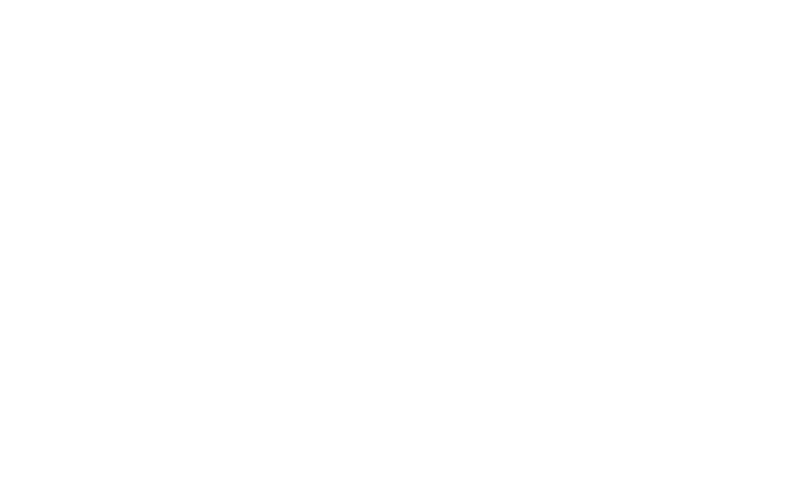

In [64]:
consumer_payments_ratio_fln =  'consumer_payments_ratio_' + date + '.pdf'

# Create a PDF file
with PdfPages(pdf_path + consumer_payments_ratio_fln) as pdf:
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Hide the axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create a table
    table = ax.table(cellText=consumer_payments_ratio_df.values, colLabels=consumer_payments_ratio_df.columns, cellLoc='center', loc='center')

    # Set table style
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # Add a title
    ax.set_title('Ratio of Consumer Payments (Normalized by CEM)', fontsize=14, fontweight='bold')

    # Add the figure to the PDF
    pdf.savefig(fig)

    # Close the figure
    plt.close(fig)

In [ ]:
pmr_cpr_dic = {}

for case_name in case_names:
    percentage_profits_df = percentage_profits_dic[case_name]
    consumer_payments_ratio = consumer_payments_ratio_df[consumer_payments_ratio_df['Case Name'] == case_name].iloc[0]
    
    # Create a new row with the consumer payments ratio
    new_row = pd.DataFrame({
        'Resource': ['Consumer Payments Ratio'],
        'CEM': [f"{float(consumer_payments_ratio['CEM']) * 100:.2f}%"],
        'DLAC': [f"{float(consumer_payments_ratio['DLAC']) * 100:.2f}%"],
        'DLAC Imperfect': [f"{float(consumer_payments_ratio['DLAC Imperfect']) * 100:.2f}%"],
        'SLAC': [f"{float(consumer_payments_ratio['SLAC']) * 100:.2f}%"]
    })
    
    # Append the new row to the dataframe
    percentage_profits_df = pd.concat([percentage_profits_df, new_row], ignore_index=True)
    
    # Update the dictionary
    pmr_cpr_dic[case_name] = percentage_profits_df

# pmr_cpr_dic
# concatenate all the dataframes in pmr_cpr_dic, adding a row for the name of the case
pmr_cpr_combined_df = pd.DataFrame()

for case_name, df in pmr_cpr_dic.items():
    df.insert(0, 'Case Name', case_name)
    pmr_cpr_combined_df = pd.concat([pmr_cpr_combined_df, df], ignore_index=True)


# replace the names of the cases with the print names
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('2_Hour_Batteries_Case', '2 Hr Bat')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('2_Hour_Batteries_Case_Fuelx2', '2 Hr Bat, Fuel Costs x2')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('4_Hour_Batteries_Case', '4 Hr Bat')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('4_Hour_Batteries_Case_Fuelx2', '4 Hr Bat, Fuel Costs x2')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('4_Hour_Batteries_Case_Fuelx3', '4 Hr Bat, Fuel Costs x3')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('4_Hour_Batteries_Case_Fuelx4', '4 Hr Bat, Fuel Costs x4')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('6_Hour_Batteries_Case', '6 Hour Bat')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('6_Hour_Batteries_Case_Fuelx2', '6 Hr Bat, Fuel Costs x2')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('8_Hour_Batteries_Case', '8 Hr Bat')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('8_Hour_Batteries_Case_Fuelx2', '8 Hr Bat, Fuel Costs x2')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('10_Hour_Batteries_Case', '10 Hr Bat')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('10_Hour_Batteries_Case_Fuelx2', '10 Hr Bat, Fuel Costs x2')
pmr_cpr_combined_df['Case Name'] = pmr_cpr_combined_df['Case Name'].replace('Thermal_Case', 'Thermal')

pmr_cpr_combined_df.to_csv(csv_path + 'pmr_cpr_combined_' + date + '.csv', index=False)

ValueError: could not convert string to float: '0%'

In [ ]:

total_system_costs_fln =  'total_system_costs_' + date + '.pdf'

# Create a PDF file
with PdfPages(pdf_path + total_system_costs_fln) as pdf:

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Hide the axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create a table
    table = ax.table(cellText=total_system_costs_df.values, colLabels=total_system_costs_df.columns, cellLoc='center', loc='center')

    # Set table style
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # Add a title
    ax.set_title(f'Total Costs for each case ($)', fontsize=14, fontweight='bold')

    # Add the figure to the PDF
    pdf.savefig(fig)

    # Close the figure
    plt.close(fig)
# END: Add unit profit tables to PDF

ErrorException: syntax: character literal contains multiple characters

In [ ]:
total_nse_df.columns

UndefVarError: UndefVarError: `total_nse_df` not defined

In [ ]:
total_nse_fln =  'total_nse_' + date + '.pdf'

# Create a PDF file
with PdfPages(pdf_path + total_nse_fln) as pdf:
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Hide the axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create a table
    table = ax.table(cellText=total_nse_df.values, colLabels=total_nse_df.columns, cellLoc='center', loc='center')

    # Set table style
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # Add a title
    ax.set_title('Total Non-served Energy for Each Case (MW)', fontsize=14, fontweight='bold')

    # Add the figure to the PDF
    pdf.savefig(fig)

    # Close the figure
    plt.close(fig)

ErrorException: syntax: character literal contains multiple characters

In [ ]:
total_unmet_rsv_fln =  'total_unmet_rsv_' + date + '.pdf'

# Create a PDF file
with PdfPages(pdf_path + total_unmet_rsv_fln) as pdf:
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Hide the axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create a table
    table = ax.table(cellText=total_unmet_rsv_df.values, colLabels=total_unmet_rsv_df.columns, cellLoc='center', loc='center')

    # Set table style
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # Add a title
    ax.set_title('Total Unmet Reserves for Each Case (MW)', fontsize=14, fontweight='bold')

    # Add the figure to the PDF
    pdf.savefig(fig)

    # Close the figure
    plt.close(fig)

ErrorException: syntax: character literal contains multiple characters